# CENSUS 10 PROJECT

## Import required packages

In [1]:
pip install ydata-profiling

In [2]:
# Import libraries for Data Analysis
import pandas as pd
import numpy as np

# Import libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for one line Exploratory Data Analysis
import ydata_profiling as pp
import sweetviz as sv

In [3]:
# pd.set_option('display.max_rows',None)

  ##      Read census10.csv
  
  - from a csv file into panda dataframes
  - inspect the dataset and analyse

In [4]:
# load the dataset from pandas

census10_df = pd.read_csv("census10.csv")
df = pd.read_csv("census10.csv")
census10_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Upland Creek,Ross,Barton,26.0,Head,Married,Male,"Solicitor, Scotland",None,Christian
1,1,Upland Creek,Amelia,Barton,26.0,Wife,Married,Female,Lawyer,None,None
2,2,Upland Creek,Francesca,Smith,50.0,Head,Married,Female,Unemployed,None,None
3,2,Upland Creek,Connor,Smith,53.0,Husband,Married,Male,Unemployed,,None
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,NaN,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,NaN,Male,Student,None,NaN
7908,1,Murphy Fortress,Rhys,Collier,3.0,Son,NaN,Male,Child,None,NaN
7909,1,Murphy Fortress,Jeffrey,Short,58.0,Visitor,Divorced,Male,"Engineer, automotive",None,None


In [5]:
# rename columns

census10_df.columns = census10_df.columns.str.replace(" ", "_")

###      Spaces are prone to error hence i replaced spaces with "_"

In [6]:
census10_df.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [7]:
census10_df.head(10)

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Upland Creek,Ross,Barton,26.0,Head,Married,Male,"Solicitor, Scotland",None,Christian
1,1,Upland Creek,Amelia,Barton,26.0,Wife,Married,Female,Lawyer,None,None
2,2,Upland Creek,Francesca,Smith,50.0,Head,Married,Female,Unemployed,None,None
3,2,Upland Creek,Connor,Smith,53.0,Husband,Married,Male,Unemployed,,None
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,NaN,Male,Student,None,NaN
5,3,Upland Creek,Paige,Walker,20.0,Head,Single,Female,University Student,None,Muslim
6,3,Upland Creek,Barbara,Wright,55.0,None,Single,Female,Public relations account executive,None,None
7,3,Upland Creek,Jacob,Stevenson,30.0,None,Single,Male,Engineering geologist,None,Catholic
8,4,Upland Creek,Declan,Forster,24.0,Head,Divorced,Male,Chartered legal executive (England and Wales),None,Christian
9,5,Upland Creek,Melanie,Kelly,49.0,Head,Married,Female,Ophthalmologist,None,Catholic


###   I inspect the first 10 rows of the Census data to get a sense of the structure of the data and the types of values in each column. This will help with understanding the dataset and deciding how to clean or preprocess the data before coming up with analyses.

In [8]:
# check the dimension

census10_df.shape

(7911, 11)

### There are 7911 rows and 11 columns in the data From the output above it shows the data set has 7911 rows and 11 columns

# Exploratory Data Analysis (EDA)

In [9]:
# check the size and structure of Census 10

census10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House_Number                   7911 non-null   int64  
 1   Street                         7911 non-null   object 
 2   First_Name                     7911 non-null   object 
 3   Surname                        7911 non-null   object 
 4   Age                            7911 non-null   float64
 5   Relationship_to_Head_of_House  7911 non-null   object 
 6   Marital_Status                 5944 non-null   object 
 7   Gender                         7911 non-null   object 
 8   Occupation                     7911 non-null   object 
 9   Infirmity                      7911 non-null   object 
 10  Religion                       5895 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 680.0+ KB


The output shows that the Census 10 DataFrame has 7911 entries and 11 columns. The columns section lists the column names, the number of non-null values and data types of each column.

The column type shows that the Census 10 data has two columns with numeric data types (int64 and float64), while the other nine columns have object data types.

We also identify missing or problematic data that will need to be addressed before running analyses. The Marital_Status and Religion columns have a non-null count that is lower than the total number of entries, showing that there are some missing values in those columns.

In [10]:
# check for missing values

census10_df.isnull().sum()

House_Number                        0
Street                              0
First_Name                          0
Surname                             0
Age                                 0
Relationship_to_Head_of_House       0
Marital_Status                   1967
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2016
dtype: int64

There are 1967 missing values in Marital Status and 2016 rows have missing data in Religion. These missing values will be corrected during the Data Preprocessing stage.

In [11]:
# describe data 
# computing descriptive statistics
census10_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
House_Number,7911.0,NaN,NaN,NaN,27.826571,28.249494,1.0,8.0,20.0,37.0,158.0
Street,7911,105,Honeysuckle Avenue,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First_Name,7911,365,Brian,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,7911,646,Smith,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7911.0,NaN,NaN,NaN,35.406854,21.228574,0.0,18.0,35.0,51.0,105.0
Relationship_to_Head_of_House,7911,20,Head,2696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,5944,4,Single,2696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,7911,3,Female,4145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,7911,1037,Student,1618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infirmity,7911,8,None,7845,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most people are female and top occupants are students. Almost all the people do not have infirmity.

25% of the population census is between 18 years and below and 75% are 51 years and above. Median is the 50%

We have to clean data set first to have a more meaningful descriptive data set

# Checking Duplicates

In [12]:
# finding duplicates

census10_df.duplicated().sum()

1

In [13]:
# Check for duplicate rows
duplicate_rows = census10_df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", sum(duplicate_rows))
#print(duplicate_rows)

duplicates = census10_df[duplicate_rows]

for index, row in duplicates.iterrows():
    print(row)

Number of duplicate rows: 1
House_Number                                 2
Street                           Howell Avenue
First_Name                             Eleanor
Surname                              Wilkinson
Age                                        6.0
Relationship_to_Head_of_House         Daughter
Marital_Status                             NaN
Gender                                  Female
Occupation                             Student
Infirmity                                 None
Religion                                   NaN
Name: 1593, dtype: object


We have one line being duplicated

In [14]:
# Extracting the duplicate
census10_df[(census10_df['House_Number']== 2)& (census10_df["Street"]=="Howell Avenue") & \
            (census10_df["First_Name"]== "Eleanor")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1592,2,Howell Avenue,Eleanor,Wilkinson,6.0,Daughter,NaN,Female,Student,None,NaN
1593,2,Howell Avenue,Eleanor,Wilkinson,6.0,Daughter,NaN,Female,Student,None,NaN


In [15]:
# Dropping the duplicate
census10_df.drop_duplicates(inplace=True)

In [16]:
# Sanity Check
census10_df[(census10_df['House_Number']== 2)& (census10_df["Street"]=="Howell Avenue") & \
            (census10_df["First_Name"]== "Eleanor")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1592,2,Howell Avenue,Eleanor,Wilkinson,6.0,Daughter,NaN,Female,Student,None,NaN


We can tell that we have dropped the duplicate

In [17]:
# check the dimension

census10_df.shape

(7910, 11)

# Data Preprocessing - 1

### - Our goal here is to clean the missing values in 
- Marital Status
- Religion in the Census 10 data.

## Cleaning Marital Status

- First, we need to investigate the problems with the Marital Status column
           
        - Which row(s) caused the change in data type?

In [18]:
# check the unique marital status
# to check categories we use unique

census10_df["Marital_Status"].unique()

array(['Married', nan, 'Single', 'Divorced', 'Widowed'], dtype=object)

In [19]:
# check the sum of the unique values in Marital Status
census10_df["Marital_Status"].nunique()

4

In [20]:
# Checking the count of each unique category
census10_df["Marital_Status"].value_counts()

Single      2696
Married     2232
Divorced     738
Widowed      278
Name: Marital_Status, dtype: int64

In [21]:
# check for blank cell in Marital Status

census10_df[census10_df["Marital_Status"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [22]:
# check the rows with missing values in Marital Status
# all rows that are nan
census10_df[census10_df["Marital_Status"].isnull()]


,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,NaN,Male,Student,None,NaN
11,5,Upland Creek,Ben,Kelly,16.0,Son,NaN,Male,Student,None,NaN
12,5,Upland Creek,Dorothy,Kelly,13.0,Daughter,NaN,Female,Student,None,NaN
13,5,Upland Creek,Lisa,Kelly,12.0,Daughter,NaN,Female,Student,None,NaN
14,5,Upland Creek,Darren,Clarke-Kelly,12.0,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7904,1,Murphy Fortress,Raymond,Collier,14.0,Son,NaN,Male,Student,None,NaN
7905,1,Murphy Fortress,Jay,Collier,10.0,Son,NaN,Male,Student,None,NaN
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,NaN,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,NaN,Male,Student,None,NaN


We notice that a number of the population under the Age of 18 have NaN values under Marital Status, hence we need to confirm and the sum

In [23]:
minors_in_marital_status = census10_df[(census10_df["Age"] < 18) & (census10_df["Marital_Status"].isnull())]
minors_in_marital_status

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,NaN,Male,Student,None,NaN
11,5,Upland Creek,Ben,Kelly,16.0,Son,NaN,Male,Student,None,NaN
12,5,Upland Creek,Dorothy,Kelly,13.0,Daughter,NaN,Female,Student,None,NaN
13,5,Upland Creek,Lisa,Kelly,12.0,Daughter,NaN,Female,Student,None,NaN
14,5,Upland Creek,Darren,Clarke-Kelly,12.0,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7904,1,Murphy Fortress,Raymond,Collier,14.0,Son,NaN,Male,Student,None,NaN
7905,1,Murphy Fortress,Jay,Collier,10.0,Son,NaN,Male,Student,None,NaN
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,NaN,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,NaN,Male,Student,None,NaN


[New law raises minimum marriage age to 18 in England and Wales](https://www.bbc.co.uk/news/uk-politics-61228240)

We can confirm that the missing values in Marital Status belong to minors. And as minors we shall replace their missing values with Minor. In UK the legal age to be married is from 18 years and all these are below the ages of 18

In [24]:
# replace the missing values in marital status with Minor
census10_df["Marital_Status"].replace(np.nan, "Minor", inplace = True)

# Sanity check
- NaN Values
- Value_counts
- Unique categories

In [25]:
census10_df[census10_df["Marital_Status"].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [26]:
census10_df["Marital_Status"]. value_counts()

Single      2696
Married     2232
Minor       1966
Divorced     738
Widowed      278
Name: Marital_Status, dtype: int64

In [27]:
census10_df["Marital_Status"].unique()

array(['Married', 'Minor', 'Single', 'Divorced', 'Widowed'], dtype=object)

In [28]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        # annotate the percentage
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  
    

    
    plt.show()  # show the plot

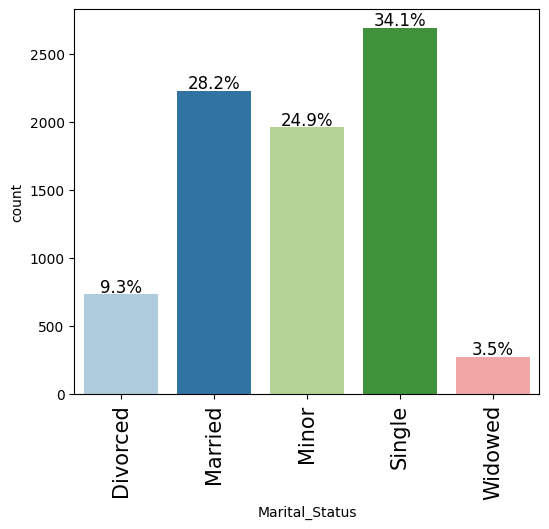

In [29]:
# Bar Plot for Marital Status
labeled_barplot(data = census10_df, feature = "Marital_Status",  perc = True)



We have 34.10% as Single, 28.20% as Married, Minors are 24.90% in our dataset and 9.30% and 3.50% as Divorced and Widowed respectively

## Cleaning Religion

- First, we need to investigate the problems with the Religion column
           
        - Which row(s) caused the change in data type?

In [30]:
# check the unique Religion Column
# to check categories we use unique or value counts

census10_df["Religion"].unique()

array(['Christian', 'None', nan, 'Muslim', 'Catholic', 'Methodist',
       'Jewish', 'Private', 'Sikh', 'Agnostic', 'Sith', 'Orthodoxy',
       'Hindu', 'Bahai', 'Baptist'], dtype=object)

In [31]:
# find the total of categories
census10_df["Religion"].nunique()

14

In [32]:
#find the count of each category in Religion
census10_df["Religion"].value_counts()

None         2617
Christian    1738
Catholic      822
Methodist     525
Muslim         91
Sikh           57
Jewish         22
Private        10
Agnostic        4
Hindu           3
Sith            2
Baptist         2
Orthodoxy       1
Bahai           1
Name: Religion, dtype: int64

In [33]:
# check for blank cell in Religion
census10_df[census10_df["Religion"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [34]:
# check the rows with missing values in Religion
# all rows that are nan
census10_df[census10_df['Religion'].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,Minor,Male,Student,None,NaN
11,5,Upland Creek,Ben,Kelly,16.0,Son,Minor,Male,Student,None,NaN
12,5,Upland Creek,Dorothy,Kelly,13.0,Daughter,Minor,Female,Student,None,NaN
13,5,Upland Creek,Lisa,Kelly,12.0,Daughter,Minor,Female,Student,None,NaN
14,5,Upland Creek,Darren,Clarke-Kelly,12.0,Son,Minor,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7904,1,Murphy Fortress,Raymond,Collier,14.0,Son,Minor,Male,Student,None,NaN
7905,1,Murphy Fortress,Jay,Collier,10.0,Son,Minor,Male,Student,None,NaN
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,Minor,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,Minor,Male,Student,None,NaN


We have 2015 missing values under Religion

## Correcting the NaN Values Religion.



We detected some lies in religion. We noticed that some of these listed Religions are not religions, Sith [Sith](https://en.wikipedia.org/wiki/Sith), Agnostic [Agnostic a philosophical view](https://world-religions.info/agnostic-religion/) and Private are not religions
[Office for National Statistics (Census 2021) Data analysis from Census 2021](https://www.ons.gov.uk/census/censustransformationprogramme/questiondevelopment/nationalidentityethnicgrouplanguageandreligionquestiondevelopmentforcensus2021).

Hence we shall change all those with these religions to None since we can confirm there are not types of religions

In UK, Parents with Parental Responsibility can decide on which religion their child or children follow up to the age of 18. At age 18 and above Religion cannot be forced on the child. 

As the children grow up they can decide have opinions on which Religion to join or not. [Changing your child’s Religion](https://www.duncanlewis.co.uk/Changing-your-Childs-Religion.html)

Therefore in cleaning the Religion column we would have first looked at
- Any person at or above the age of 18 with NaN Value replaced Unknown.

- children below 18 years were allow to inherit the Religion of their parents. If both parents belong to different religions we shall replace NaN value for child as Undecided.  

- Every other will be set to None if parents have no religion.

Ideally in the real world We would go through each unique category in Religion, find their Streets and House Numbers and replace the Nan Values with appropriate Religion for the children under 18 years.

But for this exercise, after we treat  for Sikh, Jewish, Hindu, Baptist, Orthodoxy and Bahai( the Religion with least counts) we shall replace the rest with Undecided for the children. Since as Children they do not technically decide the religion they belong to until they have attained age 18 and can then decide.

In [35]:
# changing the lies detected (Private, Sith and Agnostic) to "None"
census10_df['Religion'] = census10_df['Religion'].replace('Private','None')
census10_df['Religion'] = census10_df['Religion'].replace('Sith','None')
census10_df['Religion'] = census10_df['Religion'].replace('Agnostic','None')

In [36]:
# finding those aged 17 years or above
census10_df[(census10_df["Age"] > 17) & (census10_df["Religion"].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
95,31,Upland Creek,Teresa,Miles,18.0,Head,Single,Female,Student,None,NaN
96,31,Upland Creek,Marc,Stevens,18.0,None,Single,Male,Student,None,NaN
511,43,Edwards Station,Janice,Wilson,18.0,Lodger,Single,Female,Student,None,NaN
605,56,Edwards Station,Justin,Smith,18.0,None,Single,Male,Student,None,NaN
706,5,Manorrigg Lane,Brandon,Power,18.0,Lodger,Divorced,Male,Student,None,NaN
961,33,Butcher Street,Graham,Marsden,18.0,Lodger,Single,Male,Student,None,NaN
977,3,Virgocrack Road,Katy,Robinson,18.0,Head,Married,Female,Student,None,NaN
978,3,Virgocrack Road,Iain,Robinson,20.0,Husband,Married,Male,University Student,None,NaN
1027,16,Virgocrack Road,Nicholas,Charlton,18.0,Lodger,Divorced,Male,Student,None,NaN
1138,6,Sandy Drive,Eric,Yates,18.0,Head,Single,Male,Student,None,NaN


We have 46 people above the Age 17 with NaN values at Religion Column. We shall replace with Unknown

In [37]:
census10_df.loc[(census10_df["Age"] > 17) & (census10_df["Religion"].isnull()), "Religion"] = "Unknown"

In [38]:
# Sanity check on those aged 18 years or above
census10_df[(census10_df["Age"] > 17) & (census10_df["Religion"].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [39]:
# Checking number of nana values outstanding
census10_df[census10_df['Religion'].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,Minor,Male,Student,None,NaN
11,5,Upland Creek,Ben,Kelly,16.0,Son,Minor,Male,Student,None,NaN
12,5,Upland Creek,Dorothy,Kelly,13.0,Daughter,Minor,Female,Student,None,NaN
13,5,Upland Creek,Lisa,Kelly,12.0,Daughter,Minor,Female,Student,None,NaN
14,5,Upland Creek,Darren,Clarke-Kelly,12.0,Son,Minor,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7904,1,Murphy Fortress,Raymond,Collier,14.0,Son,Minor,Male,Student,None,NaN
7905,1,Murphy Fortress,Jay,Collier,10.0,Son,Minor,Male,Student,None,NaN
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,Minor,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,Minor,Male,Student,None,NaN


We have replaced the null values for those above age 17. After filling out the 46 NaN values we have an outstanding of 1969. Lets check with our Minors

In [40]:
# finding those aged 17 years or above
census10_df[(census10_df["Age"] <= 17) & (census10_df["Religion"].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,2,Upland Creek,Jacob,Smith,15.0,Adopted Son,Minor,Male,Student,None,NaN
11,5,Upland Creek,Ben,Kelly,16.0,Son,Minor,Male,Student,None,NaN
12,5,Upland Creek,Dorothy,Kelly,13.0,Daughter,Minor,Female,Student,None,NaN
13,5,Upland Creek,Lisa,Kelly,12.0,Daughter,Minor,Female,Student,None,NaN
14,5,Upland Creek,Darren,Clarke-Kelly,12.0,Son,Minor,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7904,1,Murphy Fortress,Raymond,Collier,14.0,Son,Minor,Male,Student,None,NaN
7905,1,Murphy Fortress,Jay,Collier,10.0,Son,Minor,Male,Student,None,NaN
7906,1,Murphy Fortress,Sophie,Collier,7.0,Daughter,Minor,Female,Student,None,NaN
7907,1,Murphy Fortress,Paul,Collier,7.0,Son,Minor,Male,Student,None,NaN


We notice that the number of missing values for Religion currently is 1969 and this figure corresponds with all those with the ages of 17 and below

### We now checking through the smaller religions to check if they could be children with NaN values but need to inherit religion of parents 

In [41]:
# Checking household for Bahai 
census10_df[census10_df["Religion"]== "Bahai"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6595,45,Stevens Lane,Ricky,Anderson,38.0,Head,Divorced,Male,Electronics engineer,None,Bahai


In [42]:
census10_df[(census10_df['House_Number']== 45)& (census10_df["Street"]=="Stevens Lane")] 

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6595,45,Stevens Lane,Ricky,Anderson,38.0,Head,Divorced,Male,Electronics engineer,None,Bahai


This person is the only one in the household hence we move on

In [43]:
# Checking Orthodoxy
census10_df[census10_df["Religion"]== "Orthodoxy"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3115,22,Blackburn Inlet,Kieran,Smith,42.0,Husband,Married,Male,Restaurant manager,None,Orthodoxy


In [44]:
census10_df[(census10_df['House_Number']== 22)& (census10_df["Street"]=="Blackburn Inlet")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3114,22,Blackburn Inlet,Julie,Smith,36.0,Head,Married,Female,Building surveyor,None,Christian
3115,22,Blackburn Inlet,Kieran,Smith,42.0,Husband,Married,Male,Restaurant manager,None,Orthodoxy
3116,22,Blackburn Inlet,Teresa,Smith,8.0,Daughter,Minor,Female,Student,None,NaN
3117,22,Blackburn Inlet,Duncan,Smith,4.0,Son,Minor,Male,Child,None,NaN


In [45]:
# Replace with Undecided
census10_df.loc[[3116, 3117], "Religion"]= ["Undecided", "Undecided"]

We replaced with Undecided because we noticed that the Head or Mother is Christian and Father is Orthodox hence it will be difficult to tell which Religion the children fall in. Hence we replace NaN values here with Undecided

In [46]:
# Checking Baptist
census10_df[census10_df["Religion"]== "Baptist"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6900,19,Estuary Street,Hilary,Wilkinson,33.0,Head,Married,Female,Ranger/warden,None,Baptist
6901,19,Estuary Street,Robin,Wilkinson,30.0,Husband,Married,Male,Health physicist,None,Baptist


In [47]:
census10_df[(census10_df['House_Number']== 19)& (census10_df["Street"]=="Estuary Street")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6900,19,Estuary Street,Hilary,Wilkinson,33.0,Head,Married,Female,Ranger/warden,None,Baptist
6901,19,Estuary Street,Robin,Wilkinson,30.0,Husband,Married,Male,Health physicist,None,Baptist
6902,19,Estuary Street,Jade,Wilkinson,5.0,Adopted Daughter,Minor,Female,Student,None,NaN
6903,19,Estuary Street,Geraldine,Wilkinson,1.0,Daughter,Minor,Female,Child,None,NaN


In [48]:
# Replace the children with NaN found with Baptist
census10_df.loc[[6902, 6903], "Religion"]= ["Baptist", "Baptist"]

In [49]:
# Checking for Hindu
census10_df[census10_df["Religion"]== "Hindu"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6232,35,Nicholls Bridge,Sheila,Fisher,68.0,Head,Widowed,Female,"Retired Therapist, speech and language",None,Hindu
6960,41,Estuary Street,Kirsty,Bevan,31.0,Head,Single,Female,"Programme researcher, broadcasting/film/video",None,Hindu
6961,41,Estuary Street,Jeffrey,Cooke,31.0,Partner,Single,Male,Brewing technologist,None,Hindu


In [50]:
# Finding NaN values
census10_df[(census10_df["House_Number"]== 35) & (census10_df["Street"]== "Nicholls Bridge") ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6232,35,Nicholls Bridge,Sheila,Fisher,68.0,Head,Widowed,Female,"Retired Therapist, speech and language",None,Hindu
6233,35,Nicholls Bridge,Trevor,Fisher,17.0,Grandson,Minor,Male,Student,None,NaN


In [51]:
# Finding NaN values
census10_df[(census10_df["House_Number"]== 41) & (census10_df["Street"]== "Estuary Street")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6960,41,Estuary Street,Kirsty,Bevan,31.0,Head,Single,Female,"Programme researcher, broadcasting/film/video",None,Hindu
6961,41,Estuary Street,Jeffrey,Cooke,31.0,Partner,Single,Male,Brewing technologist,None,Hindu


In [52]:
# convert grandson to Hindu
census10_df.loc[[6233], "Religion"]= ["Hindu"]

In [53]:
# Replacing with Jewish
census10_df.loc[[4980, 4981], "Religion"]= ["Jewish", "Jewish"]

In [54]:
# Finding NaN
census10_df[(census10_df['House_Number']== 25)& (census10_df["Street"]=="Pinewood Road")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5055,25,Pinewood Road,Caroline,Foster,67.0,Head,Married,Female,Unemployed,None,None
5056,25,Pinewood Road,Scott,Foster,67.0,Husband,Married,Male,Phytotherapist,None,None
5057,25,Pinewood Road,Maureen,Foster,37.0,Daughter,Single,Female,Phytotherapist,None,None
5058,25,Pinewood Road,Russell,Foster,34.0,Son,Single,Male,Primary school teacher,None,None
5059,25,Pinewood Road,Allan,Foster,33.0,Son,Single,Male,"Librarian, public",None,None
5060,25,Pinewood Road,Deborah,Foster,28.0,Daughter,Single,Female,Graphic designer,None,None
5061,25,Pinewood Road,Barry,Foster,27.0,Son,Divorced,Male,Fashion designer,None,None
5062,25,Pinewood Road,Jason,Foster,26.0,Son,Divorced,Male,Speech and language therapist,None,None
5063,25,Pinewood Road,Gail,Ahmed,22.0,Daughter,Single,Female,University Student,None,None
5064,25,Pinewood Road,Abbie,Ahmed,17.0,Daughter,Minor,Female,Student,None,NaN


In [55]:
# Replace with None
census10_df.loc[[5064, 5065, 5066, 5067, 5068], "Religion"]= ["None","None","None","None","None"]

Though we searched for Jewish, we noticed the Jewish here is a loger and majority of the house including Head, Husband is None hence we set the Nan values belonging to the children under 18 to inherit that of their parents

In [56]:
# Checking through Sikh Religion
census10_df[census10_df["Religion"]== "Sikh"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
448,34,Edwards Station,Gordon,Ali,27.0,Lodger,Single,Male,"Engineer, control and instrumentation",None,Sikh
509,43,Edwards Station,Hazel,Page,30.0,Sibling,Divorced,Female,Psychiatric nurse,None,Sikh
1069,28,Virgocrack Road,Aimee,Elliott,34.0,Head,Married,Female,Operational investment banker,None,Sikh
1070,28,Virgocrack Road,Elliott,Elliott,39.0,Husband,Married,Male,"Engineer, automotive",None,Sikh
1723,23,Rogers Mount,Brenda,Marshall,28.0,Lodger,Divorced,Female,Recruitment consultant,None,Sikh
1801,13,Bangor Burgs,Michelle,Hardy,31.0,Lodger,Divorced,Female,Museum/gallery curator,None,Sikh
2078,2,Brighton Neck,Lauren,Brown,30.0,Lodger,Single,Female,"Designer, ceramics/pottery",None,Sikh
2126,12,Brighton Neck,Ryan,Berry,46.0,Lodger,Single,Male,"Administrator, charities/voluntary organisations",None,Sikh
2617,4,Southampton Manor,Sharon,Smith,32.0,Head,Single,Female,Secretary/administrator,None,Sikh
2689,4,Jones Stream,Frances,Gardner,24.0,None,Single,Female,"Social research officer, government",None,Sikh


In [57]:
# Finding NaN
census10_df[(census10_df['House_Number']== 34)& (census10_df["Street"]=="Edwards Station")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
444,34,Edwards Station,Duncan,Brown,42.0,Head,Married,Male,Financial controller,None,Christian
445,34,Edwards Station,Alexandra,Brown,38.0,Wife,Married,Female,"Scientist, clinical (histocompatibility and im...",None,None
446,34,Edwards Station,Nicola,Brown,5.0,Daughter,Minor,Female,Student,None,NaN
447,34,Edwards Station,Jessica,Brown,1.0,Daughter,Minor,Female,Child,None,NaN
448,34,Edwards Station,Gordon,Ali,27.0,Lodger,Single,Male,"Engineer, control and instrumentation",None,Sikh


In [58]:
# Replacing with Undecided
census10_df.loc[[446, 447], "Religion"]= ["Undecided", "Undecided"]

We replaced with Undecided because we noticed that the Head or Father is Christian and Mother does not belong to any Religion hence it will be difficult to tell which Religion the children fall in. Hence we replace NaN values here with Undecided

In [59]:
# Replacing with Catholic
census10_df.loc[[502, 503, 504, 505, 506], "Religion"]= ["Catholic","Catholic","Catholic","Catholic","Catholic"]

In [60]:
# Replacing NaN
census10_df.loc[[1071], "Religion"]= ["Sikh"]

In [61]:
# Replacing NaN with Christian
census10_df.loc[[1721, 1722], "Religion"]= ["Christian","Christian"]

In [62]:
# Replacing NaN with Undecided
census10_df.loc[[1799, 1800], "Religion"]= ["Undecided","Undecided"]

In [63]:
# Replacing NaN with Catholic
census10_df.loc[[2077], "Religion"]= ["Catholic"]

In [64]:
# Replacing NaN with None
census10_df.loc[[2123], "Religion"]= ["None"]

In [65]:
# Replacing NaN with Sikh
census10_df.loc[[2618], "Religion"]= ["Sikh"]

In [66]:
# Replacing NaN with Sikh
census10_df.loc[[2791], "Religion"]= ["Sikh"]

In [67]:
# Replacing NaN with Sikh
census10_df.loc[[3014,3375,3593,3594], "Religion"]= ["Sikh", "Sikh","Sikh", "Sikh"]

In [68]:
# Replacing NaN with Methodist
census10_df.loc[[4799,5283], "Religion"]= ["Methodist", "Methodist"]

In [69]:
# Replacing NaN with Unknown
census10_df.loc[[4560,4561], "Religion"]= ["Unknown", "Unknown"]

In [70]:
# Replacing NaN with Sikh
census10_df.loc[[2943,2944,3603,3873,3973, 3974], "Religion"]= ["Sikh", "Sikh","Sikh","Sikh", "Sikh","Sikh"]

In [71]:
# Replacing NaN with Unknown
census10_df.loc[[3301,3786,5781], "Religion"]= ["Unknown","Unknown","Unknown"]

In [72]:
# Replacing NaN with Sikh
census10_df.loc[[3993, 3994,3995], "Religion"]= ["Sikh", "Sikh", "Sikh"]

In [73]:
# Replacing NaN with Christian
census10_df.loc[[4950, 4951,4952, 4953,4954], "Religion"]= ["Christian","Christian", "Christian","Christian","Christian" ]

In [74]:
# Replacing NaN with None
census10_df.loc[[7850, 7851, 7852, 7853, 7854,7855,7856,7857], "Religion"]= ["None", "None", "None","None","None","None","None","None"]

In [75]:
census10_df["Religion"].isnull().sum()

1909

We have 1902 missing values to still treat under Religion after we have treated for Sikh, Jewish, Private, Agnostic, Hindu, Sith, Baptist, Orthodoxy and Bahai we shall replace the rest with Undecided for the children.

In [76]:
# replace empty values with "None"

census10_df["Religion"].fillna(value = 'Undecided', inplace=True)

# Sanity check
- NaN Values
-Value_counts
- Unique categories

In [77]:
census10_df["Religion"].isnull().sum()

0

In [78]:
census10_df["Religion"].nunique()

13

In [79]:
census10_df["Religion"].unique()

array(['Christian', 'None', 'Undecided', 'Muslim', 'Catholic',
       'Methodist', 'Unknown', 'Jewish', 'Sikh', 'Orthodoxy', 'Hindu',
       'Bahai', 'Baptist'], dtype=object)

In [80]:
census10_df["Religion"].value_counts()

None         2647
Undecided    1915
Christian    1745
Catholic      828
Methodist     527
Muslim         91
Sikh           72
Unknown        51
Jewish         24
Hindu           4
Baptist         4
Orthodoxy       1
Bahai           1
Name: Religion, dtype: int64

In [81]:
# Checking if the NaN values have been treated

census10_df.isnull().sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          0
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

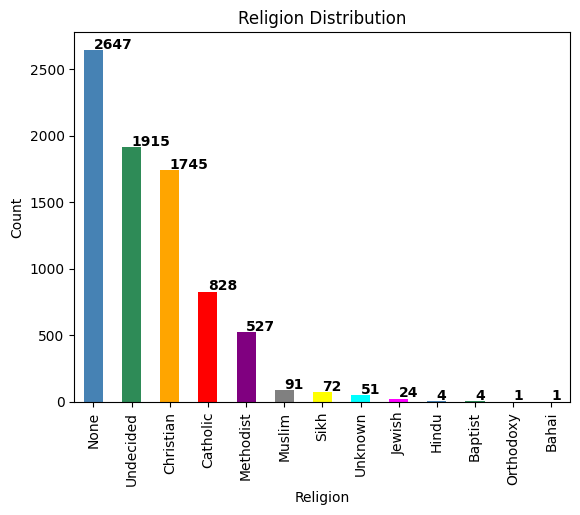

In [82]:
# Religion distribution
religion_counts = census10_df['Religion'].value_counts()

# define custom colors
colors = ['steelblue', 'seagreen', 'orange', 'red', 'purple', 'gray', 'yellow', 'cyan', 'magenta']

# plot the bar chart with custom colors
ax = religion_counts.plot(kind='bar', color=colors)

# set the title and axis labels
ax.set_xlabel('Religion')
ax.set_ylabel('Count')
ax.set_title('Religion Distribution')

# add numbers on top of the bars
for i, v in enumerate(religion_counts):
    ax.text(i, v+10, str(v), color='black', fontweight='bold')

# show plot
plt.show()


From our BarChart it is evident it will not be wise to develop a Religious Building for now. Maybe in the future when the denomination of the population change a need arises. Majority of the population do not have a religion or undecided. The Christian, Catholic and Methodist form the next majority but there is already a religious building which already serving a purpose hence for now i believe an additional Religious Building should not be done on the unoccupied plot.

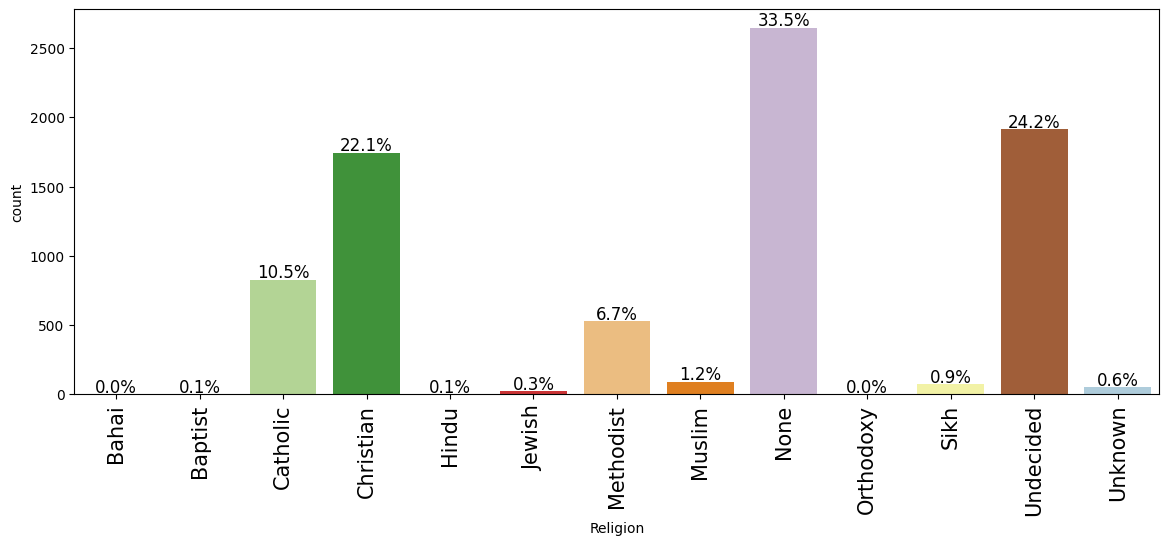

In [83]:
# Bar Plot for Religion
labeled_barplot(data = census10_df, feature = "Religion",  perc = True) 
# Save plot


### We notice 57.60% of the population do not have Religion. For those who indicated to have a Religion, 22.3% are more of Christians, followed by Catholic with 10.50%  and 6.70% to be Methodist. Few people belong to other religions which amounts to about 2.70% in total.

### Decision Making:- it will not be prudent to build religious building for now expecially when majority of the population are not religious. It is not a pressing need to be catered for. Christianity is likely to expand so as other religions but does not enjoy a big following to merit a Religious building currently, perhaps in the future.

## Finding Empty Values in Census 10 Dataset

In [84]:
# checkng empty values

column_list = census10_df.columns # retrieves the column names from the Census 10 DataFrame.
column_list.values.tolist()

columns_with_empty_values = []
for column in column_list: # iterates over each column in column_list
    if census10_df[census10_df[str(column)] == ' '].shape[0] > 0: # checks if any row in the column has an empty value
        columns_with_empty_values.append(column) # appended to the columns_with_empty_values list.
print(columns_with_empty_values)

['First_Name', 'Surname', 'Gender', 'Occupation', 'Infirmity']


The output shows that there are five columns (First_Name, Surname, Gender, Occupation, Infirmity) which have empty values. These empty values will be corrected during the Data Preprocessing stage.

# Data Preprocessing

### - Our goal here is to clean the empty values in 
- First Name
- Surname
- Gender
- Occupation
- Infirmity

##  Cleaning First Name 

   - First, we need to investigate the problems with the First Name column
           
        - Which row(s) caused the change in data type?

In [85]:
# Check the unique of First_Name in alphabetical order 
# To check categories we use unique or value counts

sorted(census10_df["First_Name"].unique())

[' ',
 'Aaron',
 'Abbie',
 'Abdul',
 'Abigail',
 'Adam',
 'Adrian',
 'Aimee',
 'Alan',
 'Albert',
 'Alex',
 'Alexander',
 'Alexandra',
 'Alice',
 'Alison',
 'Allan',
 'Amanda',
 'Amber',
 'Amelia',
 'Amy',
 'Andrea',
 'Andrew',
 'Angela',
 'Ann',
 'Anna',
 'Anne',
 'Annette',
 'Anthony',
 'Antony',
 'Arthur',
 'Ashleigh',
 'Ashley',
 'Barbara',
 'Barry',
 'Ben',
 'Benjamin',
 'Bernard',
 'Beth',
 'Bethan',
 'Bethany',
 'Beverley',
 'Billy',
 'Bradley',
 'Brandon',
 'Brenda',
 'Brett',
 'Brian',
 'Bruce',
 'Bryan',
 'Callum',
 'Cameron',
 'Carl',
 'Carly',
 'Carol',
 'Carole',
 'Caroline',
 'Carolyn',
 'Catherine',
 'Charlene',
 'Charles',
 'Charlie',
 'Charlotte',
 'Chelsea',
 'Cheryl',
 'Chloe',
 'Christian',
 'Christine',
 'Christopher',
 'Claire',
 'Clare',
 'Clifford',
 'Clive',
 'Colin',
 'Connor',
 'Conor',
 'Craig',
 'Dale',
 'Damian',
 'Damien',
 'Daniel',
 'Danielle',
 'Danny',
 'Darren',
 'David',
 'Dawn',
 'Dean',
 'Deborah',
 'Debra',
 'Declan',
 'Denis',
 'Denise',
 'Denni

We notice empty values right from checking the unique values in First Name

In [86]:
# checking the number of First Names
census10_df["First_Name"].nunique()

365

In [87]:
# check the frequency of each first name category
first_name_freq= census10_df['First_Name'].value_counts()
first_name_freq

Brian       38
Josh        35
Joan        34
Hayley      34
Danielle    34
            ..
Rhys        11
Bernard     11
Beth        11
Timothy      6
             2
Name: First_Name, Length: 365, dtype: int64

In [88]:
# checking for empty values in First_Name
census10_df[census10_df["First_Name"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3689,49,Honeysuckle Avenue,,Perry,56.0,Head,Married,Female,Analytical chemist,None,Christian
4696,10,Morgan Avenue,,Brown,21.0,None,Single,Male,University Student,None,None


There seem to be two missing values under First_Name for indices 3689 and 4696. I shall replace " " both with Unknown since First_Names cannot be assumed for a person.

In [89]:
census10_df.loc[3689,"First_Name"]= 'Unknown'
census10_df.loc[4696,"First_Name"]= 'Unknown'

In [90]:
# Sanity check to confirm if Missing Values have been replaced
census10_df[census10_df["First_Name"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


After checking we can see that there are no longer missing values for First_Name

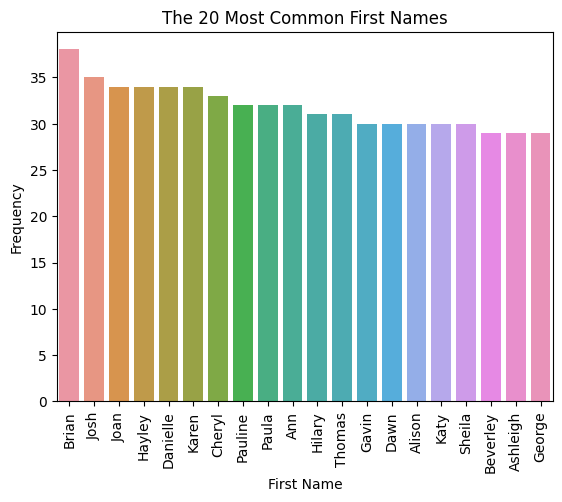

In [91]:
# plot the 20 most common first names
sns.barplot(x=first_name_freq[:20].index, y=first_name_freq[:20].values)

# rotate top 20 common first names to be able to read out well
plt.xticks(rotation=90)

# set axis labels and title
plt.xlabel('First Name')
plt.ylabel('Frequency')
plt.title('The 20 Most Common First Names')

# Save plot as PNG image
plt.savefig('20_Most_Common_First_Names.png', bbox_inches='tight')

# show plot
plt.show()


The Barplot shows a visual of the 20 frequent First Names of our Census 10 datase.

##  Cleaning Surname 

   - First, we need to investigate the problems with the Surname column
           
        - Which row(s) caused the change in data type?

In [92]:
# Check the unique of Surname in alphabetical order 
# To check categories we use unique or value counts

sorted(census10_df["Surname"].unique())

[' ',
 'Abbott',
 'Adams',
 'Ahmed',
 'Ahmed-Collins',
 'Akhtar',
 'Alexander',
 'Ali',
 'Allan',
 'Allen',
 'Anderson',
 'Andrews',
 'Archer',
 'Armstrong',
 'Arnold',
 'Ashton',
 'Atkins-Hall',
 'Atkinson',
 'Austin',
 'Bailey',
 'Bailey-Dawson',
 'Baker',
 'Baldwin',
 'Ball',
 'Ball-Henry',
 'Banks',
 'Barber',
 'Barker',
 'Barker-Nolan',
 'Barlow',
 'Barnes',
 'Barnes-Johnson',
 'Barnes-Slater',
 'Barnett',
 'Barrett',
 'Barry',
 'Bartlett',
 'Barton',
 'Bates',
 'Baxter',
 'Begum',
 'Bell',
 'Bennett',
 'Benson',
 'Bentley',
 'Berry',
 'Bevan',
 'Bibi',
 'Birch',
 'Bird',
 'Bishop',
 'Black',
 'Blackburn',
 'Blake',
 'Bolton',
 'Bond',
 'Bond-Kent',
 'Booth',
 'Bowen',
 'Boyle',
 'Bradley',
 'Bradley-Ryan',
 'Bradshaw',
 'Brady',
 'Bray',
 'Brennan',
 'Briggs',
 'Brookes',
 'Brooks',
 'Brown',
 'Brown-Barry',
 'Brown-Perry',
 'Browne',
 'Bruce',
 'Bruce-Harvey',
 'Bryant',
 'Buckley',
 'Bull',
 'Burgess',
 'Burgess-Martin',
 'Burke',
 'Burns',
 'Burns-Morgan',
 'Burrows',
 'Burrow

We notice empty values right from checking the unique values in Surname

In [93]:
# checking the number of uniques surnames
census10_df["Surname"].nunique()

646

In [94]:
# check the frequency of each surname category
surname_freq = census10_df["Surname"].value_counts()
surname_freq

Smith          242
Jones          221
Williams       133
Brown          105
Evans          100
              ... 
Carey            1
Giles-Dyer       1
O'Donnell        1
Winter-Wall      1
Sinclair         1
Name: Surname, Length: 646, dtype: int64

In [95]:
# checking for empty values in Surname
census10_df[census10_df["Surname"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3921,120,Honeysuckle Avenue,Adrian,,23.0,Son,Single,Male,"Therapist, occupational",None,Christian


To find the surname for Adrian we notice at Relationship to Head of House, He is a son and so we will find his surname by checking with the Street and the House Number he belongs to then we can tell his Surname

In [96]:
census10_df[(census10_df['House_Number']== 120) &(census10_df["Street"]=="Honeysuckle Avenue")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3919,120,Honeysuckle Avenue,Amy,Roberts,46.0,Head,Divorced,Female,Unemployed,None,Christian
3920,120,Honeysuckle Avenue,Debra,Roberts,23.0,Daughter,Single,Female,"Conservator, museum/gallery",None,None
3921,120,Honeysuckle Avenue,Adrian,,23.0,Son,Single,Male,"Therapist, occupational",None,Christian


From the narrowing down we can tell Adrian belongs with the Roberts family name

In [97]:
census10_df.loc[3921,"Surname"]= 'Roberts'

In [98]:
# Sanity check to confirm if Missing Values have been replaced
census10_df[census10_df["Surname"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


After checking we can see that there are no longer missing values for Surname

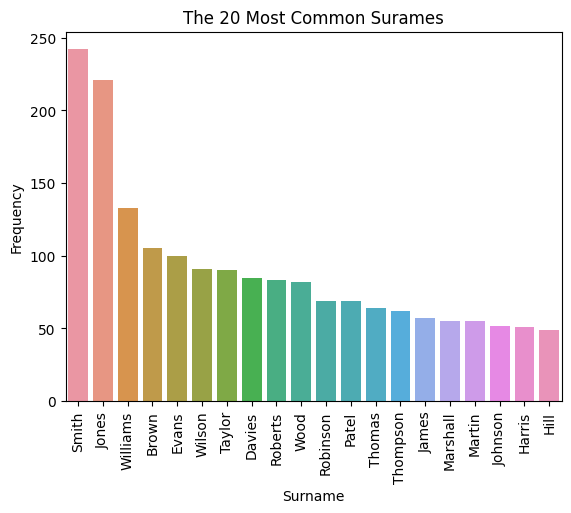

In [99]:
# plot the 20 most common first names
sns.barplot(x=surname_freq[:20].index, y=surname_freq[:20].values)

# rotate top 20 common first names to be able to read out well
plt.xticks(rotation=90)

# set axis labels and title
plt.xlabel('Surname')
plt.ylabel('Frequency')
plt.title('The 20 Most Common Surames')

# Save plot as PNG image
plt.savefig('20_Most_Common_Surames.png', bbox_inches='tight')

# show plot
plt.show()

The Barplot shows a visual of the 20 Frequent Surnames of our Census 10 datase.

##  Cleaning Gender

   - First, we need to investigate the problems with the Gender column
           
        - Which row(s) caused the change in data type?

In [100]:
# check the unique Gender
# to check categories we use unique or value counts

census10_df["Gender"].unique()

array(['Male', 'Female', ' '], dtype=object)

We notice empty values right from checking the unique values in Gender

In [101]:
# Checking the sum of the categoreis
census10_df["Gender"].nunique()

3

In [102]:
# Checking the count of each category
census10_df["Gender"].value_counts()

Female    4144
Male      3765
             1
Name: Gender, dtype: int64

In [103]:
# extract the rows with the empty values for Gender
census10_df[census10_df["Gender"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
7591,73,Brown Crescent,Kathryn,Wallace,24.0,Daughter,Divorced,,Telecommunications researcher,None,Christian


We notice the Relationship to the head of house is daughter and her First Name is usually named after females and so we assume a Female gender for Kathryn Wallace

In [104]:
# Change empty Gender to Female because the Relationship to head of house is Daughter as well as her First Name indicates female

census10_df.loc[7591,"Gender"]= 'Female'

In [105]:
# sanity check
census10_df[census10_df["Gender"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [106]:
# Sanity check to confirm that Gender column has been cleaned
census10_df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

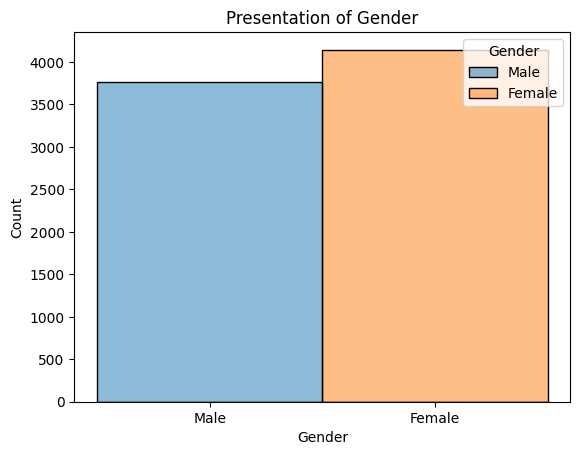

In [107]:
# create a histplot to show the distribution of male and female

sns.histplot(data=census10_df, x='Gender', hue='Gender')

# set axis labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Presentation of Gender')

#show plot
plt.show()


From the Histplot we can automatically tell that there are more female than males as this was mentioned in the descriptive computational analysis previously.

##  Cleaning Occupation

   - First, we need to investigate the problems with the Occupation column
           
        - Which row(s) caused the change in data type?

In [108]:
# check for the unique occupation in alphabetical order
sorted(census10_df["Occupation"].unique())

[' ',
 'Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accountant, chartered public finance',
 'Accounting technician',
 'Actor',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, charities/voluntary organisations',
 'Administrator, education',
 'Administrator, local government',
 'Administrator, sports',
 'Adult guidance worker',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising art director',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Air cabin crew',
 'Air traffic controller',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animal technologist',
 'Animator',
 'Applications developer',
 'Arb

We notice and empty value after checking the categories. This will be resolved.

In [109]:
# checking the total of the unique categories
census10_df["Occupation"].nunique()

1037

In [110]:
# checking the count of each category
census10_df["Occupation"].value_counts()

Student                            1617
Unemployed                          489
University Student                  453
Child                               449
Social worker                        15
                                   ... 
Retired Politician's assistant        1
Retired Oncologist                    1
Retired Probation officer             1
Retired Chief Operating Officer       1
Retired Engineer, production          1
Name: Occupation, Length: 1037, dtype: int64

In [111]:
# Extracting all the Retired Professions
census10_df[census10_df["Occupation"].str.startswith("Retired")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
43,14,Upland Creek,Howard,Wood,72.0,Head,Single,Male,Retired Sales executive,None,Catholic
83,27,Upland Creek,Lynn,Collier,68.0,Head,Married,Female,Retired Trading standards officer,None,Christian
84,27,Upland Creek,Leigh,Collier,69.0,Husband,Married,Male,Retired Analytical chemist,None,Christian
98,32,Upland Creek,Brenda,Rees,75.0,Head,Widowed,Female,"Retired Lecturer, higher education",None,Methodist
154,5,Holyroodbranch Avenue,Kimberley,Peters,76.0,Head,Widowed,Female,Retired Company secretary,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7788,2,Green Avenue,Francesca,Robinson,71.0,Wife,Married,Female,"Retired Engineer, electronics",None,Catholic
7805,11,Green Avenue,Stacey,Webb,73.0,Head,Married,Female,Retired Research scientist (maths),None,Christian
7806,11,Green Avenue,Tony,Webb,73.0,Husband,Married,Male,Retired Chiropodist,None,Christian
7812,14,Green Avenue,Janice,Brennan,71.0,Head,Married,Female,Retired Web designer,None,Catholic


In [112]:
# Replacing all retired work positions with retired
census10_df.loc[census10_df["Occupation"].str.startswith("Retired"), "Occupation"] = "Retired"

In [113]:
# Sanity check
census10_df.loc[census10_df["Occupation"].str.startswith("Retired")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
43,14,Upland Creek,Howard,Wood,72.0,Head,Single,Male,Retired,None,Catholic
83,27,Upland Creek,Lynn,Collier,68.0,Head,Married,Female,Retired,None,Christian
84,27,Upland Creek,Leigh,Collier,69.0,Husband,Married,Male,Retired,None,Christian
98,32,Upland Creek,Brenda,Rees,75.0,Head,Widowed,Female,Retired,None,Methodist
154,5,Holyroodbranch Avenue,Kimberley,Peters,76.0,Head,Widowed,Female,Retired,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7788,2,Green Avenue,Francesca,Robinson,71.0,Wife,Married,Female,Retired,None,Catholic
7805,11,Green Avenue,Stacey,Webb,73.0,Head,Married,Female,Retired,None,Christian
7806,11,Green Avenue,Tony,Webb,73.0,Husband,Married,Male,Retired,None,Christian
7812,14,Green Avenue,Janice,Brennan,71.0,Head,Married,Female,Retired,None,Catholic


We replaced all Occupation with Retired attached to the profession to Retired

In [114]:
# Exceptions
census10_df[(census10_df["Occupation"] == "Unemployed") & (census10_df["Age"] > 65)]


,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
385,27,Edwards Station,Natasha,Evans,93.0,Head,Married,Female,Unemployed,None,None
535,47,Edwards Station,Lynda,Bishop,71.0,Head,Single,Female,Unemployed,None,None
816,34,Burton Lane,Rosie,Briggs,77.0,Head,Widowed,Female,Unemployed,None,None
1373,20,Eaglebelt Road,Kirsty,Mann,73.0,Head,Widowed,Female,Unemployed,None,Christian
1881,16,Wright River,Vanessa,Hill,79.0,Head,Widowed,Female,Unemployed,None,Christian
3285,7,Newport Street,Linda,Gilbert,66.0,Head,Widowed,Female,Unemployed,None,None
3679,44,Honeysuckle Avenue,Ashleigh,Hall,76.0,Head,Widowed,Female,Unemployed,None,Christian
3695,52,Honeysuckle Avenue,June,Knight,74.0,Head,Widowed,Female,Unemployed,None,Christian
4054,6,Bletchley Road,Amelia,Coates,71.0,Head,Widowed,Female,Unemployed,None,None
4147,9,Taylor Lane,Catherine,Banks,78.0,Head,Widowed,Female,Unemployed,None,Christian


We found 22 supposed unemployed who were above the ages of 65. The retirement age is at 65. Hence we will convert these unemployed into retired.

In [115]:
# Converting the exception into Retired.
census10_df.loc[(census10_df["Occupation"] == "Unemployed") & (census10_df["Age"] >= 65), "Occupation"] = "Retired"


In [116]:
# Sanity check
census10_df["Occupation"].nunique()

645

In [117]:
census10_df["Occupation"].value_counts()

Student                                  1617
Retired                                   629
Unemployed                                462
University Student                        453
Child                                     449
                                         ... 
Legal executive                             1
Curator                                     1
Therapist, occupational                     1
English as a foreign language teacher       1
Community development worker                1
Name: Occupation, Length: 645, dtype: int64

In [118]:
census10_df[census10_df["Occupation"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
418,30,Edwards Station,Alexander,Haynes,52.0,Partner,Single,Male,,None,Christian
2881,26,Dundee Haven,Mohammed,O'Connor,19.0,Head,Single,Male,,None,Methodist


I noticed two blank rows while cleaning my occupation column with the ages 52 and 19.

I decided to replace the column with age 52 with "unknown" so we dont lose information from other features, while i used the mode value for the column with age 19 since there are mostly University students

In [119]:
# Extracting the details for the 19 year old
census10_df[(census10_df['Street'] == 'Dundee Haven') & (census10_df['House_Number'] == 26)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2881,26,Dundee Haven,Mohammed,O'Connor,19.0,Head,Single,Male,,None,Methodist
2882,26,Dundee Haven,Katy,Collins,22.0,None,Single,Female,University Student,None,Catholic
2883,26,Dundee Haven,Geoffrey,Wood,21.0,None,Single,Male,University Student,None,Methodist
2884,26,Dundee Haven,Cameron,Ross,26.0,None,Single,Male,PhD Student,None,Catholic
2885,26,Dundee Haven,Dorothy,Warner,18.0,None,Single,Female,University Student,None,Unknown


In [120]:
# All students in House Number 26 and Street Dundee Haven are University Students.
census10_df.loc[2881,"Occupation"]= 'University Student'

All students in House Number 26 and Street Dundee Haven are University Students hence i replaced Mohammed O'Connor's empty value under occupation with University Student.

In [121]:
# Extracting the details for the 52 year old
census10_df[(census10_df['Street'] == 'Edwards Station') & (census10_df['House_Number'] == 30)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
417,30,Edwards Station,Eileen,Campbell,50.0,Head,Single,Female,"Conservation officer, historic buildings",None,Christian
418,30,Edwards Station,Alexander,Haynes,52.0,Partner,Single,Male,,None,Christian
419,30,Edwards Station,Stewart,Campbell,26.0,Son,Widowed,Male,Sports coach,None,Christian
420,30,Edwards Station,Frank,Campbell,22.0,Son,Widowed,Male,University Student,None,Christian
421,30,Edwards Station,Conor,Campbell,7.0,Son,Minor,Male,Student,None,Undecided


We are unable to tell the exact occupation for Alexander Haynes who is the 52 year old hence we will replace his occupation with Unknown

In [122]:
# Set the 52 year old man occupation to unknown.
census10_df.loc[418,"Occupation"]= "Unknown"

In [123]:
# Sanity check
census10_df[census10_df["Occupation"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


The are no empty values under Occupation after running a sanity check.

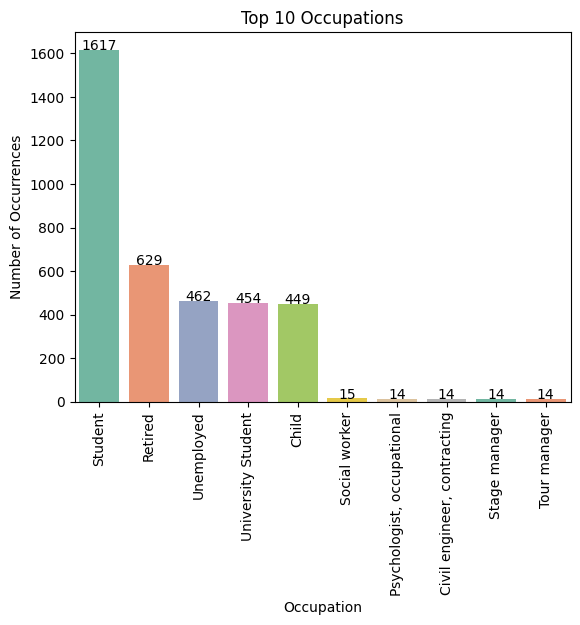

In [124]:
# assuming your dataset is named 'census10_df' and has a column 'occupation'

# group the data by occupation and count the number of occurrences
occupations = census10_df['Occupation'].value_counts()

# take the top 10 occupations
top_occupations = occupations[:10]

# create a bar plot using Seaborn
sns.barplot(x=top_occupations.index, y=top_occupations.values, palette="Set2")

# set the title and axis labels
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Occurrences')

# annotate the bars with their respective values
for i, v in enumerate(top_occupations.values):
    plt.text(i, v, str(v), color='black', ha="center")

# rotate the x-axis labels for better visibility
plt.xticks(rotation = 90)

# show the plot
plt.show()

We see the Top 10 Occupations and their number of occurrences with Student leading, followed by Retired and Unemployed. Will the government have to put in place Universities, Colleges, Technical Institutions and career training programs to absorb the Students when they transition from Studentship. With the number unemployed, should Government invest to more job opportunities to cater for the unemployed. We can tell after we have cleaned the data

##  Cleaning Infirmity

   - First, we need to investigate the problems with the Gender column
           
        - Which row(s) caused the change in data type?

In [125]:
# check the unique Infirmity Column
# to check categories we use unique or value counts

census10_df["Infirmity"].unique()

array(['None', ' ', 'Mental Disability', 'Deaf', 'Blind',
       'Unknown Infection', 'Physical Disability', 'Disabled'],
      dtype=object)

We find empty values after finding the various categories in Infirmity

In [126]:
# Find total of the unique categories
census10_df["Infirmity"].nunique()

8

In [127]:
# find the count of each category in Infirmity
census10_df["Infirmity"].value_counts()

None                   7844
Physical Disability      22
                         11
Unknown Infection         9
Blind                     8
Disabled                  8
Deaf                      5
Mental Disability         3
Name: Infirmity, dtype: int64

In [128]:
# find the empty values in Infirmity
census10_df[census10_df["Infirmity"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3,2,Upland Creek,Connor,Smith,53.0,Husband,Married,Male,Unemployed,,None
1590,2,Howell Avenue,Laura,Wilkinson,47.0,Head,Single,Female,Emergency planning/management officer,,Catholic
2749,2,Wessex Crest,Darren,Howells,21.0,Son,Single,Male,University Student,,None
2843,11,Dundee Haven,Carole,Cook,14.0,Daughter,Minor,Female,Student,,Undecided
3853,97,Honeysuckle Avenue,Mark,Walker,44.0,Husband,Married,Male,Special effects artist,,None
4433,3,Oxford Island,Ellie,Price,13.0,Daughter,Minor,Female,Student,,Undecided
4793,20,Williams Crescent,Derek,Hughes,34.0,Son,Single,Male,"Development worker, community",,Christian
4926,4,Pinewood Road,Diane,Williams,4.0,Daughter,Minor,Female,Child,,Undecided
5021,17,Pinewood Road,Patricia,Hall,38.0,Lodger,Single,Female,Analytical chemist,,Catholic
6143,3,Nicholls Bridge,Amelia,Jackson,20.0,Head,Single,Female,University Student,,Methodist


We confirm we have eleven empty values

In [129]:
# replace empty values with "Unknown"

census10_df["Infirmity"].replace([' '],'Unknown', inplace=True)

We replaced with the Unknown in Infirmity. We could not assume if the empty values was an error or unknown ailment hence it will be safe to replace the empty values with the 'Unknown'

In [130]:
# Sanity check
census10_df["Infirmity"].value_counts()

None                   7844
Physical Disability      22
Unknown                  11
Unknown Infection         9
Blind                     8
Disabled                  8
Deaf                      5
Mental Disability         3
Name: Infirmity, dtype: int64

In [131]:
# Sanity check

census10_df[census10_df["Infirmity"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


We can confirm that we no longer have empty values no missing values in Infirmity this has been resolved

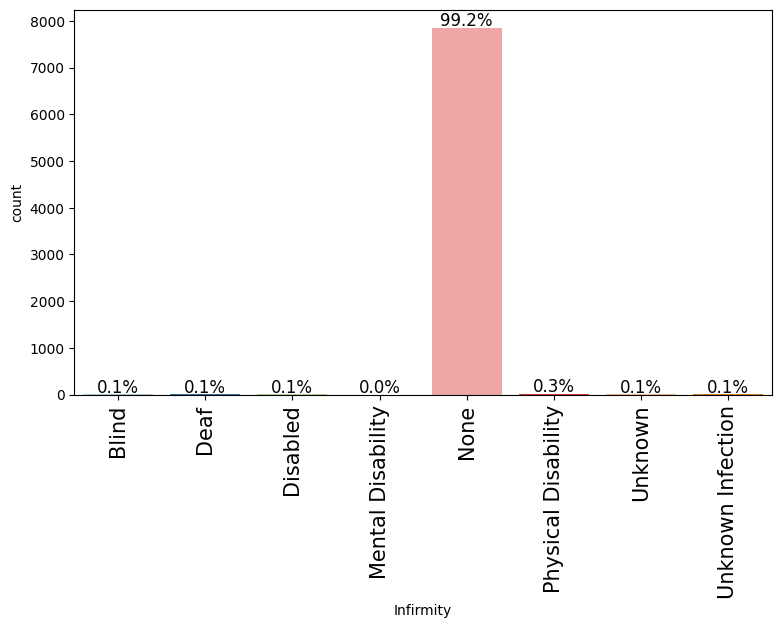

In [132]:
# Bar Plot for Infirmity
labeled_barplot(data = census10_df, feature = "Infirmity",  perc = True) 

In [133]:
# checkng empty values

column_list = census10_df.columns # retrieves the column names from the Census 10 DataFrame.
column_list.values.tolist()

columns_with_empty_values = []
for column in column_list: # iterates over each column in column_list
    if census10_df[census10_df[str(column)] == ' '].shape[0] > 0: # checks if any row in the column has an empty value
        columns_with_empty_values.append(column) # appended to the columns_with_empty_values list.
print(columns_with_empty_values)

[]


We can confirm that we have cleaned all empty values in the Census 10 Dataset

# Data Preprocessing


### - We shall investigate the remaining columns
- Age
- Relationship to Head of House
- House Number
- Street

# Checking the Age column to see if we have any errors or problems

In [134]:
# check the unique of Age in ascending order

sorted(census10_df["Age"].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 44.99999999999999,
 45.0,
 46.0,
 47.0,
 47.99999999999999,
 48.0,
 48.99999999999999,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 54.05786897698146,
 55.0,
 56.0,
 56.05786897698146,
 57.0,
 57.38855894195958,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 62.38855894195958,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 70.86192055213981,
 71.0,
 72.0,
 73.0,
 73.85023218712693,
 74.0,
 75.0,
 76.0,
 76.85023218712693,
 77.0,
 78.0,
 78.86192055213981,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 87.09483634131259,
 88.0,
 88.1154104595438,
 89.0,
 90.0,
 91.0,
 92.0,
 92.0948363413126,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 105.0]

In [135]:
# checking count of each category in Age
census10_df["Age"].value_counts()

42.000000     151
38.000000     146
39.000000     145
40.000000     142
34.000000     136
             ... 
101.000000      1
93.000000       1
56.057869       1
99.000000       1
62.388559       1
Name: Age, Length: 117, dtype: int64

In [136]:
# We have our age to be in float and we would like to convert to integer

census10_df["Age"]= census10_df["Age"].astype(int)

In [137]:
# sanity check
census10_df["Age"].info()

<class 'pandas.core.series.Series'>
Int64Index: 7910 entries, 0 to 7910
Series name: Age
Non-Null Count  Dtype
--------------  -----
7910 non-null   int32
dtypes: int32(1)
memory usage: 350.7 KB


In [138]:
# we find a descriptive computational analysis on the Age

census10_df["Age"].describe().T

count    7910.000000
mean       35.409608
std        21.226112
min         0.000000
25%        18.000000
50%        35.000000
75%        51.000000
max       105.000000
Name: Age, dtype: float64

Our output shows that we have 7911 values in out Age column. We have a mean age of 35.4 years and median age (50th percentile) to 35 years. The standard deviation is 21.2 years. The youngest person has an age of 0 years, while the oldest person has an age of 105 years. 75% of the individuals are 51 years old or younger and 25% of the population are 18 years old or below.

# Visualization for the descriptive computational analysis on Age

In [139]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

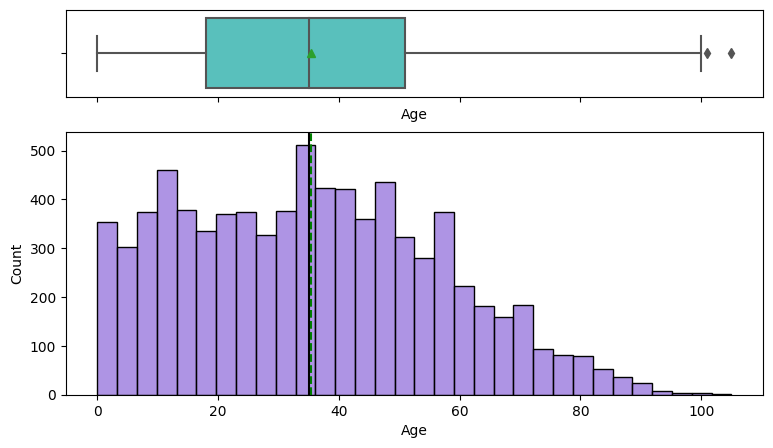

In [140]:
histogram_boxplot(data = census10_df, feature = "Age")

# Save plot as PNG image
plt.savefig('Descriptive_Graph_on_Age.png', bbox_inches='tight')

# show plot
plt.show()

The Age data is rightly skewed due to the outliers or the ages around 100 to 105. We can tell they are the Ages after 100 years but we calculate to confirm the outliers. We can also tell that the Mean and Median are quiet close.

In [141]:
#Calculate the interquartile range (IQR), which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
Q1 = census10_df["Age"].quantile(0.25) # (25th percentile)
Q3 = census10_df["Age"].quantile(0.75) # (50th percentile)
IQR = Q3 - Q1

In [142]:
# Calculate the top and least limits for outliers
top_limit = Q3 + 1.5*IQR # add 1.5 times the IQR to Q3 to get the top limit for outliers.
least_limit = Q1 - 1.5*IQR # subtract 1.5 times the IQR from Q1 to get the least limit for outliers.

In [143]:
# find outliers
outliers = census10_df[(census10_df["Age"] < least_limit) | (census10_df["Age"] > top_limit)]
outliers

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
314,20,Edwards Station,Clifford,McCarthy,105,Husband,Married,Male,Retired,None,Christian
1574,14,Iqbal Drive,Chelsea,Potts,101,Head,Widowed,Female,Retired,None,None


We can confirm that the outliers are the ages after Age 100. They are 101 and 105 years. We will maintain the ages at that and do nothing to them

## The Age Pyramid

In [144]:
# calculating age pyramid we have the below
Age_group = [ ((i-1)*5 ,  (i-1)*5 + 4)  for i in range(1,22)] + [(105, 109)]
print (Age_group)

[(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99), (100, 104), (105, 109)]


In [145]:
#Age_group = [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99), (100, 104), (105, float('inf'))]

Count_males = []
Count_females = []
for pp in Age_group:
    pA = census10_df[census10_df['Age'] <= pp[1]] 
    pB = pA[pA['Age'] >= pp[0]]
    Count_males.append(len(pB[pB['Gender'] == 'Male']))
    Count_females.append(len(pB[pB['Gender'] == 'Female']))

Count_males = [(-1) * x for x in Count_males]
print(Count_males)
print(Count_females)

[-224, -300, -318, -279, -253, -234, -291, -298, -308, -225, -249, -237, -168, -122, -104, -64, -38, -39, -10, -2, -1, -1]
[225, 280, 273, 304, 286, 299, 356, 367, 346, 336, 255, 237, 182, 143, 97, 70, 54, 25, 5, 4, 1, 0]


In [146]:
class_age= ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104','105-109']

class_age.reverse()
Count_males.reverse()
Count_females.reverse()

p_age = pd.DataFrame({'Age': class_age, 'Male': Count_males, 'Female': Count_females})

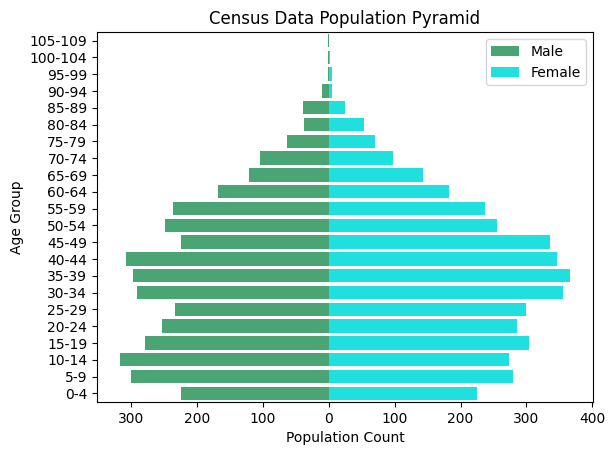

In [147]:
# Create a new figure and axis for the plot
fig, ax = plt.subplots()


# Set the x-axis tick locations and labels
xticks = [-400,-300, -200,-100, 0, 100, 200,300, 400]
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks])



# Plot positive values for both male and female bars
sns.barplot(x='Male', y='Age', data=p_age, order=class_age, color=('mediumseagreen'), label='Male', ax=ax)
sns.barplot(x='Female', y='Age', data=p_age, order=class_age, color=('cyan'), label='Female', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Population Count')
ax.set_ylabel('Age Group')
plt.title('Census Data Population Pyramid')

# Show the legend
ax.legend()

# Save plot
plt.savefig('Population_Pyramid.png', bbox_inches='tight')

# Display the plot
plt.show()

The Age Pyramid illustrates the population's mix of young and old people. A higher proportion of females than males in the older age groups reflects  a population that is ageing, while the observation that there are a little more males than females in the lower age groups suggests a relatively young population. It may be said that the population has a diverse distribution of ages as a result of the output. Life expectancy could be high given that there are a high number of young females within the Age- Specific Fertlity Rate period.

The information gathered from the Age Pyramid can help decide whether to build an Emergency medical building. Will there be a demand in certain medical services commonly required by ageing women such as Breast Cancer and Cervical Cancer screening? 

For the relatively younger population, will we need to invest in Employment and Training to create succession plans when the ageing generation retire?

Further analysis will help us on arriving at a decision.

In [148]:
# #Adding Age Group as a column

# # Define the function to categorize age into different groups
# def get_age_group(age):
#     age_ranges = [((i-1)*5, (i-1)*5+4) for i in range(1, 22)] + [(105, 109)]
#     for i, age_range in enumerate(age_ranges):
#         if age_range[0] <= age <= age_range[1]:
#             return f"{age_range[0]}-{age_range[1]}"

# # Apply the function to create a new column 'Age_Group'
# census10_df['Age_Group'] = census10_df['Age'].apply(lambda x: get_age_group(x))

# # Check the updated columns
# print(census10_df.columns)


In [149]:
 # census10_df[census10_df["Age"]==0]

# Checking the Relationship to Head of House column to see if we have any errors or problems

In [150]:
# checking unique values in Relationship to head of house column in alphabetical order
sorted(census10_df["Relationship_to_Head_of_House"].unique())

['Adopted Daughter',
 'Adopted Son',
 'Cousin',
 'Daughter',
 'Daughter-in-law',
 'Granddaughter',
 'Grandson',
 'Head',
 'Husband',
 'Lodger',
 'Neice',
 'Nephew',
 'None',
 'Partner',
 'Sibling',
 'Son',
 'Step-Daughter',
 'Step-Son',
 'Visitor',
 'Wife']

In [151]:
# check the sum of the unique categories
census10_df["Relationship_to_Head_of_House"].nunique()

20

In [152]:
#check the count of each unique value
census10_df["Relationship_to_Head_of_House"].value_counts()

Head                2696
Son                 1404
Daughter            1333
Husband              841
None                 459
Lodger               353
Wife                 271
Partner              241
Granddaughter         69
Grandson              62
Cousin                40
Sibling               38
Visitor               31
Step-Son              15
Nephew                14
Step-Daughter         14
Adopted Son           13
Adopted Daughter       9
Neice                  5
Daughter-in-law        2
Name: Relationship_to_Head_of_House, dtype: int64

In [153]:
# check for missing values in the Relationship_to_Head_of_House column
census10_df["Relationship_to_Head_of_House"].isnull().sum()

0

In [154]:
# check to find empty values
census10_df[census10_df["Relationship_to_Head_of_House"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


We can confirm that we have no missing value or empty values in Relationship_to_Head_of_House.

But we noticed that Niece is wrongly spelt hence we will correct "Neice" to "Niece"

In [155]:
# extract the rows with "Neice"
census10_df[census10_df["Relationship_to_Head_of_House"]== "Neice"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
837,44,Burton Lane,Julie,Wilson,11,Neice,Minor,Female,Student,None,Undecided
2187,13,Williams Stream,Susan,Lowe,14,Neice,Minor,Female,Student,None,Undecided
4114,10,England Lane,Tina,Wilson,2,Neice,Minor,Female,Child,None,Undecided
5791,53,Thorpe Road,Jodie,Chambers,8,Neice,Minor,Female,Student,None,Undecided
7516,42,Brown Crescent,Anne,Nash,13,Neice,Minor,Female,Student,None,Undecided


In [156]:
# We replace the "Neice" with "Niece" as we fill it has been wrongly spelt
census10_df["Relationship_to_Head_of_House"].replace("Neice", "Niece", inplace = True)

In [157]:
# sanity check
census10_df[census10_df["Relationship_to_Head_of_House"]== "Neice"]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


### checking for outliers or lies in underage that are wives, husbands or partners to Relationship to head of house

In [158]:
# check for under age that are wife, husband, partner or head of house
census10_df[(census10_df['Relationship_to_Head_of_House'].str.contains('Head|Wife|Partner|Husband')) & (census10_df['Age'] < 18)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4446,8,Oxford Island,Victoria,Rowe,16,Head,Single,Female,Student,None,Undecided
4828,33,Williams Crescent,Suzanne,Foster,15,Head,Divorced,Female,Student,None,Undecided
7090,7,Dunn Lane,Hugh,Holt-Parkin,16,Head,Married,Male,Student,None,Undecided


We noticed that we have three outliers. We have 3 underaged acting as Head of the house. We shall investigate the homes they belong to ascertain their positions or confirm if they are lies. If they are lies and we do not have enough information we will drop those rows or change their ages to represent the median ages

In [159]:
census10_df[(census10_df['Street'] == 'Oxford Island') & (census10_df['House_Number'] == 8)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4446,8,Oxford Island,Victoria,Rowe,16,Head,Single,Female,Student,None,Undecided
4447,8,Oxford Island,Bethan,Rowe,0,Daughter,Minor,Female,Child,None,Undecided
4448,8,Oxford Island,Elliott,Marshall,47,Lodger,Divorced,Male,Retail manager,None,None
4449,8,Oxford Island,Samantha,Duncan,50,Lodger,Single,Female,Customer service manager,None,Christian


We check the household of Victoria Rowe aged 16 years and we notice that eventhough it says she is the Head, Occupation is Student. Until you attain the age of 18 years you cannot be a Head hence we detect this to be a lie or an anomality. There is a baby name Bethan Rowe. We can assume that the baby belongs to Victoria Rowe but could Victoria have lied about her age? Did she also lie about being a Student eventhough she might have stated that she is the Head of House?  To be eligible to vote one must be 18 years in UK [Eligibility to vote](https://www.gov.uk/how-to-vote). So did Victoria lie about her age and Occupation to avoid voting? We shall drop the row. 

In [160]:
census10_df[(census10_df['Street'] == 'Dunn Lane') & (census10_df['House_Number'] == 7)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
7090,7,Dunn Lane,Hugh,Holt-Parkin,16,Head,Married,Male,Student,None,Undecided
7091,7,Dunn Lane,Caroline,Holt-Parkin,19,Wife,Married,Female,University Student,None,Unknown
7092,7,Dunn Lane,Cameron,Holt-Parkin,2,Son,Minor,Male,Child,None,Undecided


A check in the household of Hugh Holt- Parkin aged 16 years shows that he is the Head, Occupation is student hence we can detect this as a lie or an anomality. Is Hugh Holt- Parkin lying about his age and affirms it with Occupation in order to avoid voting? We shall drop the row

In [161]:
census10_df[(census10_df['Street'] == 'Williams Crescent') & (census10_df['House_Number'] == 33)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4828,33,Williams Crescent,Suzanne,Foster,15,Head,Divorced,Female,Student,None,Undecided
4829,33,Williams Crescent,Darren,Austin,58,Lodger,Single,Male,Risk manager,None,None
4830,33,Williams Crescent,Eric,Barnes,57,Lodger,Single,Male,Unemployed,None,Christian
4831,33,Williams Crescent,Zoe,Jackson,42,Lodger,Single,Female,Medical illustrator,None,Methodist


In checking the household of Suzanne Foster aged 15 years we notice she is Divorced. It shows that she is the Head which is impossible because you cannot be a Head until age 18, Occupation is student hence we can detect this as a lie or an anomality. We shall drop the row

In [162]:
# Dropping rows
census10_df = census10_df.drop([4446, 4828, 7090])

In [163]:
# Sanity check

# check for under age that are wife, husband, partner or head of house after dropping the outliers or lies found
census10_df[(census10_df['Relationship_to_Head_of_House'].str.contains('Head|Wife|Partner|Husband')) & (census10_df['Age'] < 18)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


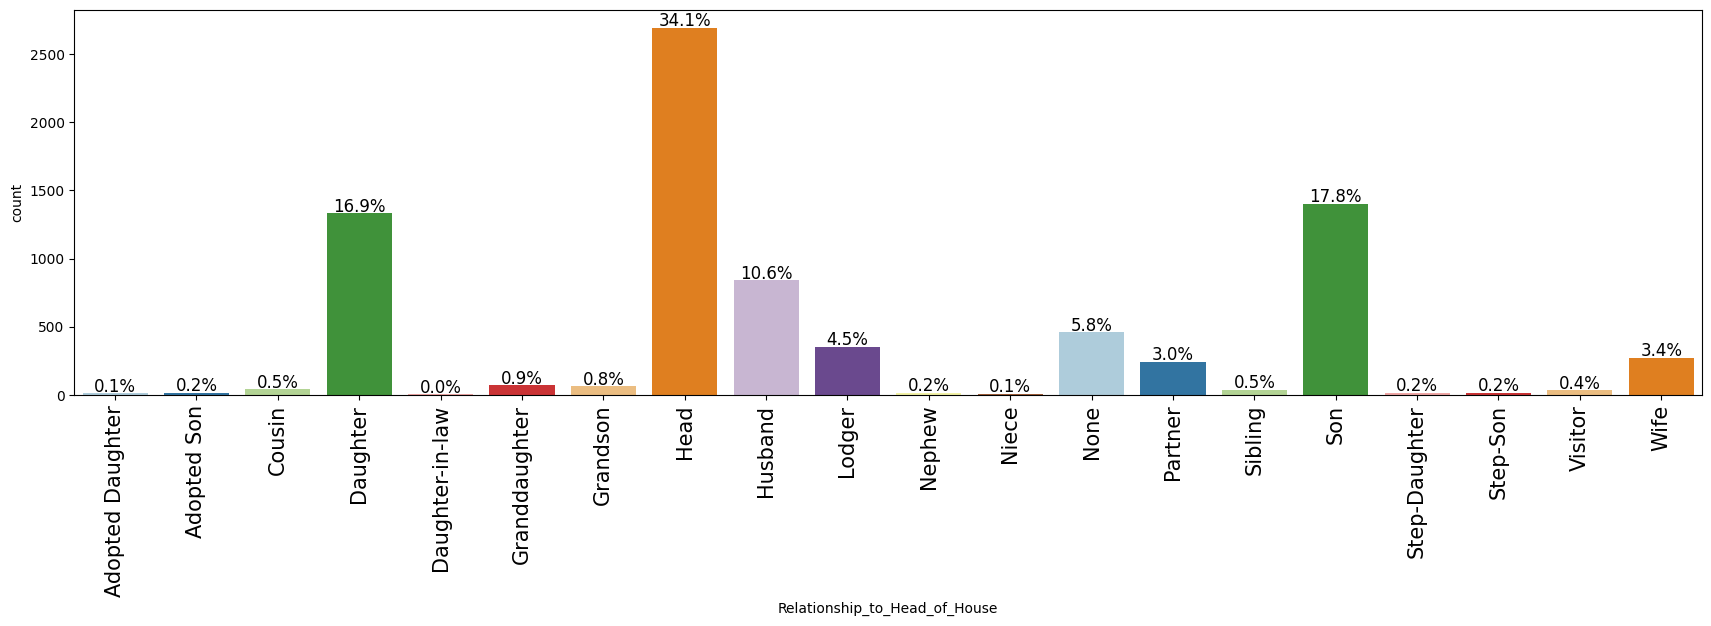

In [164]:
# Bar Plot of Relationship to the Head of House
labeled_barplot(data = census10_df, feature = "Relationship_to_Head_of_House", 
               perc = True)


More of the people are Head of Household with 34.10% followed by Sons with 17.80%. Daughter follows with 16.90% and then Husband with 10.60%. These four categories amount to 79.40%

# Checking the House Number column to see if we have any errors or problems

In [165]:
# check the unique of House_Number

census10_df["House_Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158], dtype=int64)

In [166]:
#checking the number of each unique value in House Number
census10_df["House_Number"].value_counts()

1      342
3      260
4      256
2      254
5      251
      ... 
137      3
158      3
146      2
131      2
152      1
Name: House_Number, Length: 158, dtype: int64

In [167]:
# number of unique house numbers
census10_df["House_Number"].nunique()

158

In [168]:
# check for missing values in the House_Number column
census10_df["House_Number"].isnull().sum()

0

In [169]:
census10_df[census10_df["House_Number"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


Every other thing seems ok after checking the category. We can confirm that we have no missing value or empty values in House_Number.

In [170]:
# computing descriptive statistics
census10_df["House_Number"].describe().T

count    7907.000000
mean       27.834324
std        28.253234
min         1.000000
25%         8.000000
50%        20.000000
75%        37.000000
max       158.000000
Name: House_Number, dtype: float64

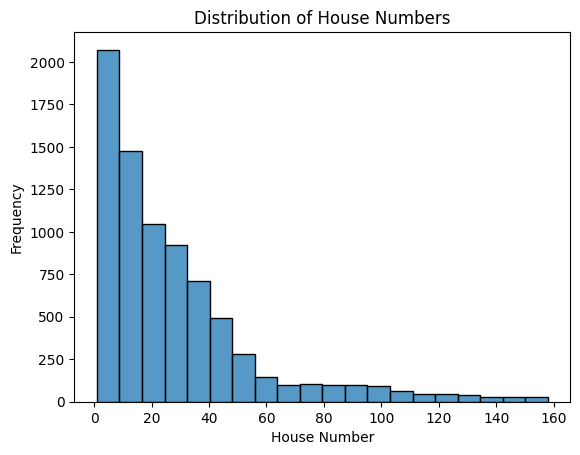

In [171]:
# Data Visualization for House_Number

# create a histogram of house numbers
sns.histplot(census10_df['House_Number'], bins=20)

# set axis labels and title
plt.xlabel('House Number')
plt.ylabel('Frequency')
plt.title('Distribution of House Numbers')

# Save plot as PNG image
plt.savefig('Distribution_of_House_Numbers.png', bbox_inches='tight')

# show the plot
plt.show()

# Checking the Street column to see if we have any errors or problems

In [172]:
# check the unique of Street in alphabetical order

sorted(census10_df["Street"].unique())

['Albion Street',
 'Anderson Castle',
 'Appletree Avenue',
 'Arthur Cove',
 'Bangor Burgs',
 'Bennett Street',
 'Blackburn Inlet',
 'Bletchley Road',
 'Brighton Neck',
 'Brown Crescent',
 'Brown Lodge',
 'Burton Lane',
 'Butcher Street',
 'Calendar Drive',
 'Campbell Terrace',
 'Canterbury Factory',
 'Column Lane',
 'Conifer Lane',
 'Cumberland Street',
 'Curtis Avenue',
 'Davis Hollow',
 'Dundee Haven',
 'Dunn Lane',
 'Eaglebelt Road',
 'Edwards Station',
 'England Green',
 'England Lane',
 'Estuary Street',
 'Faulkner Road',
 'Fox Square',
 'Grant Tower',
 'Green Avenue',
 'Green Street',
 'Gregory Abbey',
 'Harper Fort',
 'Harris Commune',
 'Harrison Wells',
 'Hawthorn Citadel',
 'Henge Drive',
 'Holyroodbranch Avenue',
 'Honeysuckle Avenue',
 'Howell Avenue',
 'Iqbal Drive',
 'Jackson Neck',
 'James Land',
 'James View',
 'Jones Stream',
 'Jones Track',
 'June Hall',
 'Kent Hill',
 'Leviathan Avenue',
 'Lewis Trace',
 'Lowe Tower',
 'Main Lane',
 'Manorrigg Lane',
 'March Motorway'

In [173]:
# number of unique street names
census10_df["Street"].nunique()

105

In [174]:
# check the count of each unique value
census10_df["Street"].value_counts()

Honeysuckle Avenue    504
Edwards Station       439
Stevens Lane          413
Pinewood Road         354
Brown Crescent        327
                     ... 
Hawthorn Citadel        5
Anderson Castle         4
Lowe Tower              3
Harper Fort             3
Grant Tower             2
Name: Street, Length: 105, dtype: int64

In [175]:
# check for missing values in the Street column
census10_df["Street"].isnull().sum()

0

In [176]:
census10_df[census10_df["Street"]== " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


There does not seem to be a problem with Street after checking through the categories. We can confirm that we have no missing value or empty values in Street column.

We have a lot of streets and we want to show the relationship between House Number and Street. Hence we shall sort out the first 20 largest streets.

In [177]:
census10_df.groupby("Street")["House_Number"].value_counts()

Street         House_Number
Albion Street  18              5
               24              5
               27              5
               31              5
               1               4
                              ..
Wright River   44              2
               1               1
               10              1
               11              1
               24              1
Name: House_Number, Length: 2696, dtype: int64

##  Analysis and Visualization

### - Number of people on top 20 streets
### - Distribution of House Numbers on Top 20 streets

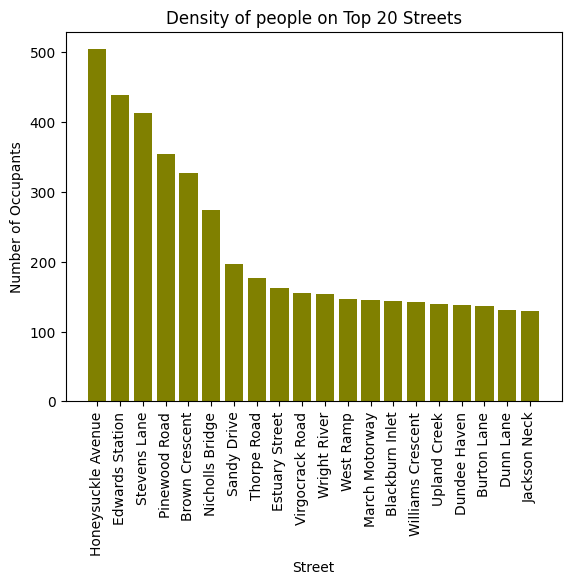

In [178]:
# Calculate number of houses on each street
street_counts = census10_df['Street'].value_counts()

# Get top 20 streets
top_20_streets = street_counts.head(20)

# Plot number of houses on each street
fig, ax = plt.subplots()
ax.bar(top_20_streets.index, top_20_streets.values)

# Group streets by density
high_density_streets = top_20_streets[top_20_streets > 50].index
low_density_streets = top_20_streets[top_20_streets <= 50].index

# Highlight high density streets
ax.bar(high_density_streets, top_20_streets.loc[high_density_streets], color='olive')

plt.xticks(rotation=90)

# Label plot
ax.set_xlabel('Street')
ax.set_ylabel('Number of Occupants')
ax.set_title('Density of people on Top 20 Streets')

# Save plot as PNG image
plt.savefig('density_people_by_street_top_20.png', bbox_inches='tight')

plt.show()

The Bar Chart indicates the number of people on each street, as some streets seem to have more than others. Streets such as Honeysuckle Avenue, Edwards Station, Steven Lane have more 300 occupants on the street

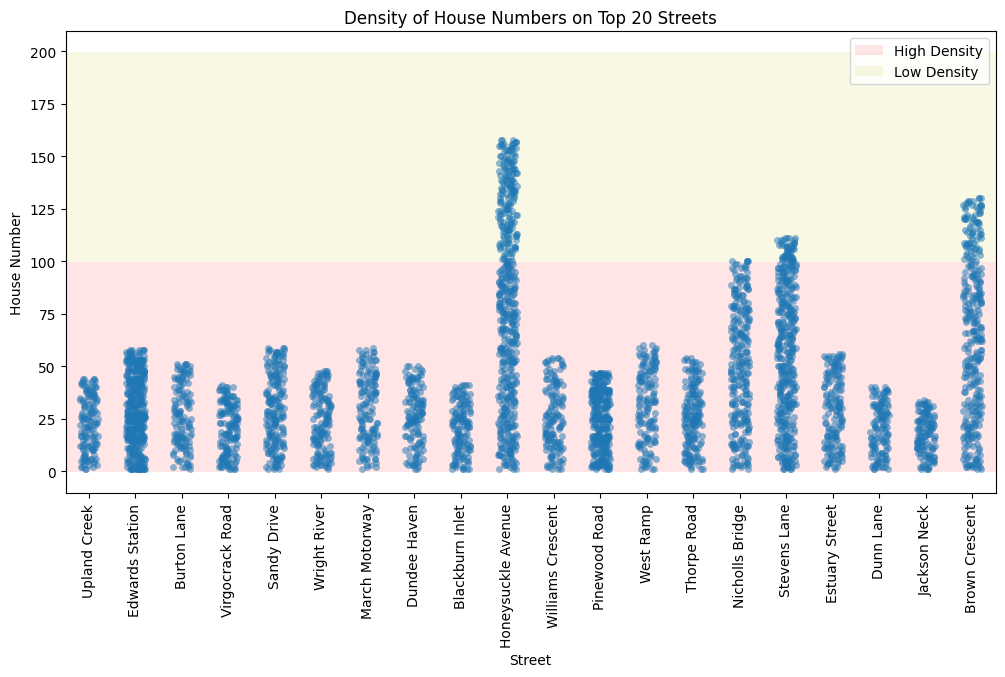

In [179]:
# Select top 20 streets by house count
top_20_streets = census10_df['Street'].value_counts().nlargest(20).index

# Create a new dataframe with only house number and street for the top 20 streets
top_20_houses = census10_df.loc[census10_df['Street'].isin(top_20_streets), ['Street', 'House_Number']]

# Plot house numbers on each street
fig, ax = plt.subplots(figsize=(12,6))

sns.stripplot(x="Street", y="House_Number", data=top_20_houses, jitter=0.2, alpha=0.5, ax=ax)

# Highlight high density streets
high_density_streets = census10_df['Street'].value_counts()[census10_df['Street'].value_counts() > 50].index
ax.axhspan(-0.5, 99.5, facecolor='r', alpha=0.1, label='High Density')
ax.axhspan(99.5, 199.5, facecolor='y', alpha=0.1, label='Low Density')

ax.legend()

plt.xticks(rotation=90)

# Label plot
ax.set_xlabel('Street')
ax.set_ylabel('House Number')
ax.set_title('Density of House Numbers on Top 20 Streets')

# Save plot as PNG image
plt.savefig('density_house_numbers_on_top_streets.png', bbox_inches='tight')

plt.show()


This code selects the top 20 streets with the highest house count and creates a new dataframe with only the house numbers and street names for the top 20 streets. It then plots the distribution of house numbers on each of those streets using a strip plot. It also highlights the high-density streets with a red background and the low-density streets with a yellow background. The plot can help in decision-making by giving an idea of the density of housing on each street and identifying streets that may be suitable for high-density or low-density housing.

From the Density plots we can instantly tell that HoneySuckle Avenue and Brown Cresent have a wider range of house numbers than others. We noticed Edwards Station and Pinewood Road have quiet a number of occupants on these streets and High-density housing would be a good fit for the area, as it would allow for more housing units to be built in a smaller area and would be more suitable for an urban or city environment. The streets with relatively even distribution can benefit from Low density housing, as it would allow for more space between homes and a quieter, more suburban feel.

However, it's important to note that a plot of house numbers and street names alone may not provide enough information to make a decision about whether to build high-density or low-density housing. Other factors such as infrastructure availability, Profession, Lodgers or Commuters would also need to be taken into account

# Data Visualization showing Relationship between age and Relationship to the Head of House

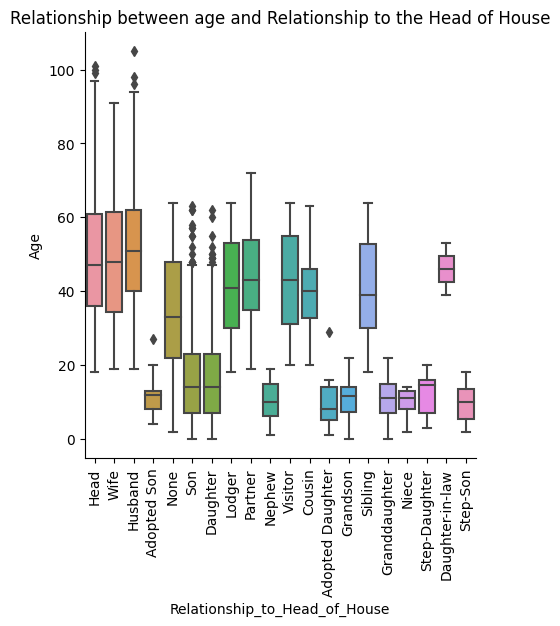

In [180]:
# Relationship between age and Relationship to the Head of House
sns.catplot(x = "Relationship_to_Head_of_House", y= "Age", data = census10_df, kind = "box")

# rotate to be able to read out well
plt.xticks(rotation=90)

# Set axis and labels
plt.xlabel("Relationship_to_Head_of_House")
plt.ylabel("Age")
plt.title("Relationship between age and Relationship to the Head of House")

# save plot
plt.savefig("Relationship_to_Head_of_House_and_Age.png")

# show plot
plt.show()

# Data Visualization for Marital Status and Age

In [181]:
## Descriptive Computational Analysis of the various categories in Marital Status

In [182]:
census10_df[census10_df["Marital_Status"] == "Single"]["Age"].describe()

count    2695.000000
mean       37.823006
std        13.776379
min        18.000000
25%        26.000000
50%        36.000000
75%        48.000000
max        97.000000
Name: Age, dtype: float64

In [183]:
census10_df[census10_df["Marital_Status"] == "Married"]["Age"].describe()

count    2231.000000
mean       50.545047
std        16.112041
min        18.000000
25%        39.000000
50%        49.000000
75%        61.000000
max       105.000000
Name: Age, dtype: float64

In [184]:
census10_df[census10_df["Marital_Status"] == "Minor"]["Age"].describe()

count    1966.000000
mean        9.012208
std         4.996167
min         0.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        17.000000
Name: Age, dtype: float64

In [185]:
census10_df[census10_df["Marital_Status"] == "Widowed"]["Age"].describe()

count    278.000000
mean      63.208633
std       19.429211
min       18.000000
25%       55.250000
50%       69.000000
75%       76.000000
max      101.000000
Name: Age, dtype: float64

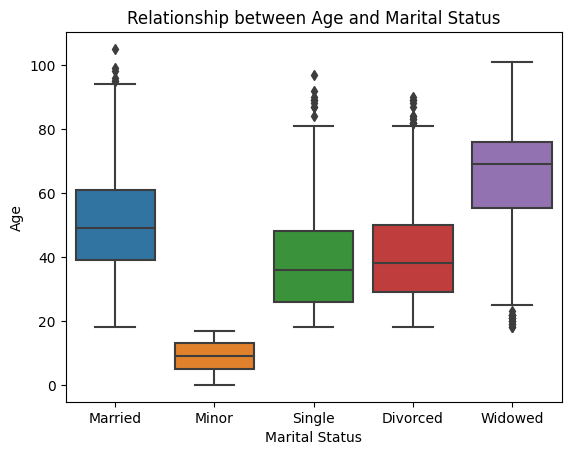

In [186]:
# Data Visualization between Marital status and age

# we create a box plot
sns.boxplot(x=census10_df['Marital_Status'], y=census10_df['Age'])

# set axis labels and title
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Relationship between Age and Marital Status')

#save plot

plt.savefig("Marital Status and_Age.png")

# show the plot
plt.show()


The interquartile range (IQR), as boxes shown in the plot, is the range of ages for each marital status group between the 25th percentile (least quartile) and the 75th percentile (top quartile). Each marital status group's median age is shown as a line inside a box.

The range of values within 1.5 times the IQR above or below the upper or lower quartile, respectively, is shown by the whiskers. An outlier is a point that lies outside the whiskers.

On average we notice the Widowed are older compared to the other categories aside the outliers

According to the plot, people who are married, separated, widowed, or divorced have older median ages than people who are single and minor. Additionally, with a few outliers, the age range for those who are widowed is wider than it is for people in other marital status groups.Minor has no outlier

In [187]:
# show a descriptive computational analysis of age and gender together
census10_df.groupby("Age")["Gender"].describe().T

Age,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,105
count,78,90,88,97,96,102,104,126,120,128,...,1,2,2,1,1,1,1,1,1,1
unique,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
top,Male,Female,Male,Male,Female,Female,Female,Male,Male,Male,...,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male
freq,43,51,47,50,51,58,52,68,66,70,...,1,2,2,1,1,1,1,1,1,1


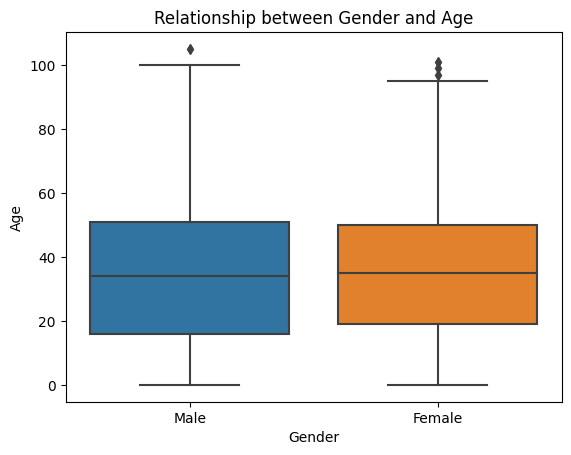

In [188]:
# Data Visualization for the relationship between Age and Gender

# create a box plot
sns.boxplot(x='Gender', y='Age', data=census10_df)

# set axis labels and title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Relationship between Gender and Age')

plt.savefig('Gender_and_Age.png', bbox_inches='tight')

# show the plot
plt.show()


The Boxplot shows computational analysis between  Age and Gender shown in the table above the plot. We can instantly figure out the median, minimum and maximum values for both genders. We also notice some outliers but that is not the focus of this plot.

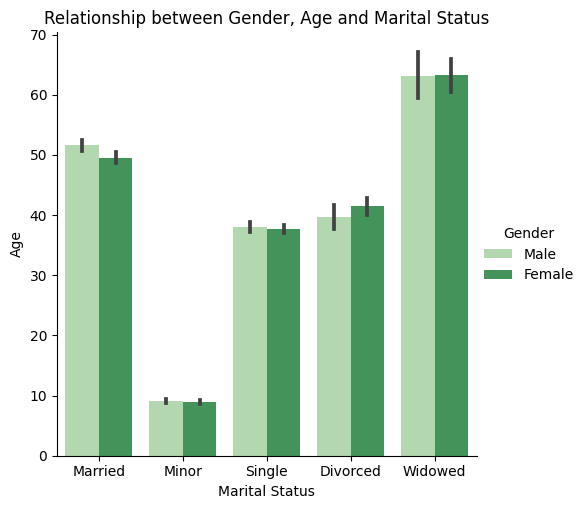

In [189]:
# Data Visualization for the relationship between Marital status, Age and Gender

# create a count plot
sns.catplot(x='Marital_Status', y = 'Age', hue='Gender', kind= "bar" ,palette='Greens', data=census10_df)

# set axis labels and title
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Relationship between Gender, Age and Marital Status')

# Save plot
plt.savefig("Marital_Status, Gender and_Age.png")

# show the plot
plt.show()

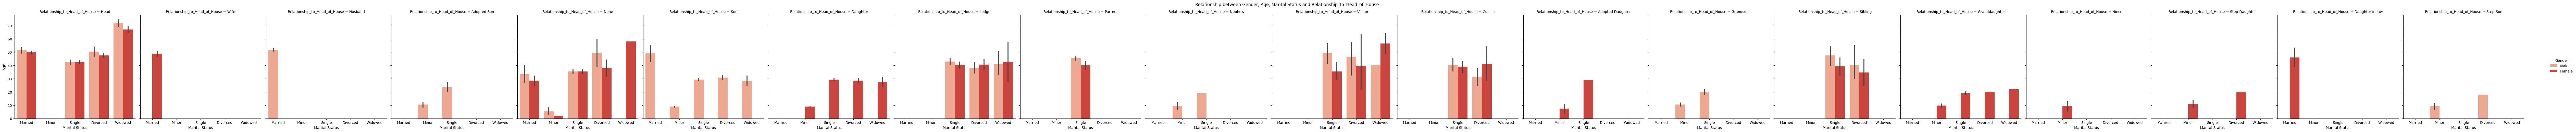

In [190]:
# Data Visualization for the relationship between Relationship to head of house, Marital status, Gender and Age. 

# create the plot using a facet grid
g = sns.catplot(x='Marital_Status', y='Age', hue='Gender', col='Relationship_to_Head_of_House', kind='bar', palette='Reds', data=census10_df)

# set axis labels and title
g.set_axis_labels('Marital Status', 'Age')
g.fig.suptitle('Relationship between Gender, Age, Marital Status and Relationship_to_Head_of_House', y=1.03)

# save the plot to a file
plt.savefig('Gender_Age_Marital_Rlp_Head_of_House.png')

# show the plot
plt.show()


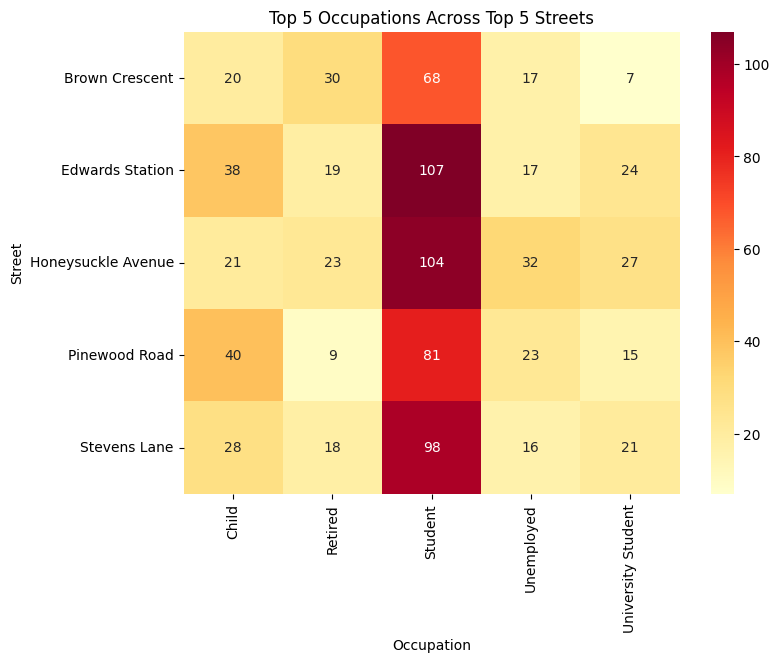

In [191]:
# Assuming your dataset is named 'census10_df' and has columns 'Street' and 'Occupation'

# Select the top 5 streets and occupations
top_n = 5
top_streets = census10_df['Street'].value_counts().head(top_n).index
top_occupations = census10_df['Occupation'].value_counts().head(top_n).index

# Filter the dataset to include only the top 5 streets and occupations
filtered_data = census10_df[census10_df['Street'].isin(top_streets) & census10_df['Occupation'].isin(top_occupations)]

# Count the number of people in each street and occupation
street_occupation_count = filtered_data.groupby(['Street', 'Occupation']).size().reset_index(name='Count')

# Pivot the data to have 'Street' as index, 'Occupation' as columns, and 'Count' as values
street_occupation_pivot = street_occupation_count.pivot_table(index='Street', columns='Occupation', values='Count', fill_value=0)

# Create a heatmap of the top 5 occupations across the top 5 streets
plt.figure(figsize=(8,6))
sns.heatmap(street_occupation_pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Top 5 Occupations Across Top 5 Streets')
plt.xlabel('Occupation')
plt.ylabel('Street')

# Save the plot as a PNG image
plt.savefig('top5_occupations_across_top5_streets.png', bbox_inches='tight')

plt.show()

From the Heatmap plot we notice majority of Occupation to be Students and major on Honeysuckle Avenue, Edwards Station and Stevens Lane, followed by Pinewood Road and then Brown Cresent. We notice the streets also have quite a number of children as well. With this information will it make sense to build a train station to aid Students commute to and fro schools? Will we need to invest in more universities and technical schools to accommodate these students when they graduate from school and want to upgrade or invest in child care facilities?

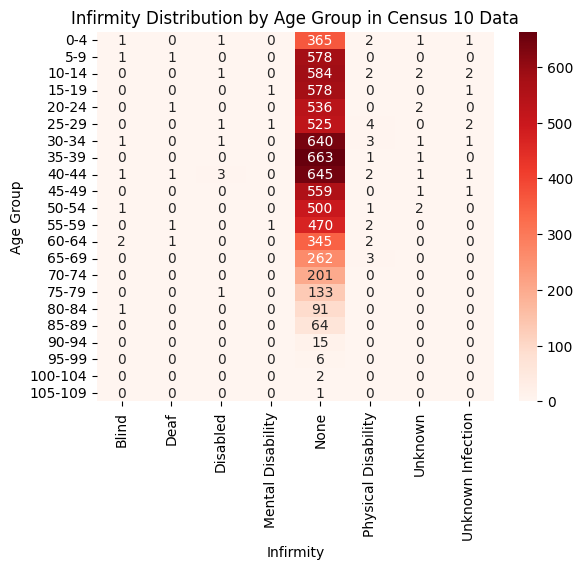

In [192]:
# create age groups
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104', '105-109']
census10_df['Age_Group'] = pd.cut(census10_df['Age'], bins=bins, labels=labels)

# group the data by age group and infirmity
age_infirmity_counts = census10_df.groupby(['Age_Group', 'Infirmity']).size().unstack()

# create a stacked bar chart
#age_infirmity_counts.plot(kind='bar', stacked=True)

# Create the heatmap
sns.heatmap(age_infirmity_counts, cmap='Reds', annot=True, fmt='.0f', cbar=True)

# add labels and title
plt.ylabel("Age Group")
plt.xlabel("Infirmity")
plt.title("Infirmity Distribution by Age Group in Census 10 Data")

# display the plot
plt.show()

Interpretation: The heatmap shows the frequency of infirmity by age group. We can see that the majority of individuals with None as an infirmity are in the 30-39 age group, while those with Physical Disability are in 25-34 and 65-69 age group and Mental Disability are predominantly in the 15-19, 25-29 and 50-59 age group. But in the will we need to put in place a health facility center for the near future as the population will age and aging comes with its health challenges

### Data Visualization showing Relationship between age and Religion

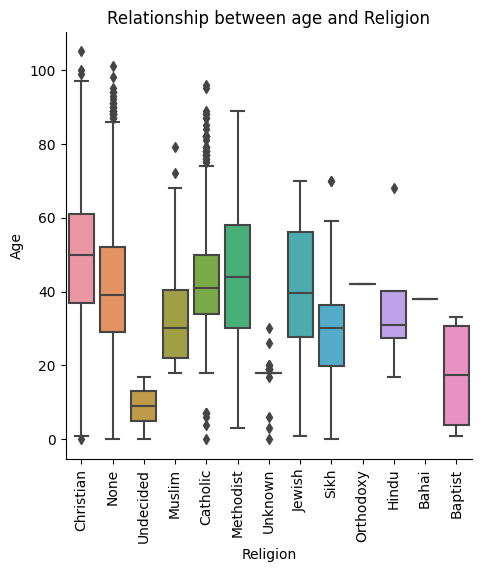

In [193]:
# Relationship between age and Religion
sns.catplot(x = "Religion", y= "Age", data = census10_df, kind = "box")

# rotate to be able to read out well
plt.xticks(rotation=90)

# Set axis and labels
plt.xlabel("Religion")
plt.ylabel("Age")
plt.title("Relationship between age and Religion")

# save plot
plt.savefig("Religion_and_Age.png")

# show plot
plt.show()

Average age for Christian is high. Most of the younger people are within Undecided or Unknown. Are they ashamed to join a religion or identify with any. Or it could be that their religions were not indicated. Baptist and Muslim have some young and young adults in these categories. Average age for Methodist also seems aged

In [194]:
#Adding Age Group as a column

# Define the function to categorize age into different groups
def get_age_group(age):
    age_ranges = [((i-1)*5, (i-1)*5+4) for i in range(1, 22)] + [(105, 109)]
    for i, age_range in enumerate(age_ranges):
        if age_range[0] <= age <= age_range[1]:
            return f"{age_range[0]}-{age_range[1]}"

# Apply the function to create a new column 'Age_Group'
census10_df['Age_Group'] = census10_df['Age'].apply(lambda x: get_age_group(x))

# Check the updated columns
print(census10_df.columns)


Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age_Group'],
      dtype='object')


In [195]:
 census10_df[census10_df["Age"]== 0]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Age_Group
120,39,Upland Creek,Donald,Wilson,0,Son,Minor,Male,Child,None,Undecided,0-4
203,2,Edwards Station,Garry,Phillips,0,Son,Minor,Male,Child,None,Undecided,0-4
359,24,Edwards Station,Andrew,Mason,0,Son,Minor,Male,Child,None,Undecided,0-4
466,37,Edwards Station,Susan,Smith,0,Daughter,Minor,Female,Child,None,Undecided,0-4
560,50,Edwards Station,David,Shepherd,0,Son,Minor,Male,Child,None,Undecided,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,12,Estuary Street,Geraldine,Patel,0,Daughter,Minor,Female,Child,None,Undecided,0-4
6988,50,Estuary Street,Shaun,Harrison,0,Son,Minor,Male,Child,None,Undecided,0-4
7601,77,Brown Crescent,Gerard,Kay,0,Son,Minor,Male,Child,None,Undecided,0-4
7746,6,Calendar Drive,Anna,Morgan,0,Daughter,Minor,Female,Child,None,Undecided,0-4


In [196]:
# Printing a summary of the Census 10 Data after thorough data cleaning
census10_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7910
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   7907 non-null   int64 
 1   Street                         7907 non-null   object
 2   First_Name                     7907 non-null   object
 3   Surname                        7907 non-null   object
 4   Age                            7907 non-null   int32 
 5   Relationship_to_Head_of_House  7907 non-null   object
 6   Marital_Status                 7907 non-null   object
 7   Gender                         7907 non-null   object
 8   Occupation                     7907 non-null   object
 9   Infirmity                      7907 non-null   object
 10  Religion                       7907 non-null   object
 11  Age_Group                      7907 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 772.2+ KB


We initially had 7911 rows with 11 columns and a number of missing values in Marital Status and Religion. All the Missing Values have been cleaned and an additional column was added which is the Age_Group. We also have 7907 rows after we dropped three outliers and a duplicate. We can now ascertain we have a clean data

In [197]:
#describe data 
# computing descriptive statistics
census10_df.describe(include = "all")

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Age_Group
count,7907.000000,7907,7907,7907,7907.000000,7907,7907,7907,7907,7907,7907,7907
unique,NaN,105,365,645,NaN,20,5,2,645,8,13,22
top,NaN,Honeysuckle Avenue,Brian,Smith,NaN,Head,Single,Female,Student,None,None,35-39
freq,NaN,504,38,242,NaN,2693,2695,4143,1614,7841,2647,665
mean,27.834324,NaN,NaN,NaN,35.417099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,28.253234,NaN,NaN,NaN,21.226652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20.000000,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
census10_df.to_csv("census10_cleaned.csv", index = False)

# Provide a one-line Exploratory Data Analysis (EDA)

In [199]:
from ydata_profiling import ProfileReport

In [200]:
census10_df_1 = ProfileReport(census10_df, title = "Overview of Census 10 Data")

In [201]:
census10_df_1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## We are told that The town does not have a university, but students do live in the town and commute to the nearby cities, so we shall find Students, University Students, PhD Students to find the total number of possible commuters

In [202]:
#finding students to help with number of commuters
census10_Student = census10_df[census10_df['Occupation'] == 'Student']
print ('Number of Students:',len(census10_Student))

census10_University_student = census10_df[census10_df['Occupation'] == 'University Student'] 
print ('Number of University Students:',len(census10_University_student))

census10_PhD_Student = census10_df[census10_df['Occupation'] == 'PhD Student']
print ('Number of PhD Students:',len(census10_PhD_Student))

total_students =  len(census10_Student) + len(census10_University_student) + len(census10_PhD_Student)
print('Total number of students:', total_students)

Number of Students: 1614
Number of University Students: 454
Number of PhD Students: 12
Total number of students: 2080


In [203]:
total_students_commuters =  len(census10_University_student) + len(census10_PhD_Student)
print('Total number of students commuters:', total_students_commuters)

Total number of students commuters: 466


In [204]:
#expected student to be in the university  in the next 5 years
incoming_university_student = census10_df.loc[(census10_df['Age'] >= 14) &(census10_df['Age'] <= 18) & (census10_df["Occupation"] == "Student")]
print(len(incoming_university_student))

574


We are likely to have 574 students move into the university from student grade within the next four years with all things being equal

We have a total of 466 possible commuters as various students. The town does not have its own University and we do not know if there are enough schools to cater for the 1614 students in the small town.  Though we have 454 University Students and 12 PhD students who currently commute to the larger cities Universities the Government must start making plans to build a University since there will more numbers coming out of students to become university students or rather consider a train station which can aid in the movement of the categories of students that commute to other larger cities for school. Will the Train Station be more beneficial to this imaginary town instead of Building Educational Facilities

In [205]:
# Descriptive Computational Analysis of these students

In [206]:
census10_df[census10_df["Occupation"] == "Student"]["Age"].describe()

count    1614.000000
mean       11.476456
std         3.915300
min         5.000000
25%         8.000000
50%        12.000000
75%        15.000000
max        18.000000
Name: Age, dtype: float64

In [207]:
census10_df[census10_df["Occupation"] == "University Student"]["Age"].describe()

count    454.000000
mean      20.464758
std        1.220625
min       18.000000
25%       19.000000
50%       21.000000
75%       22.000000
max       22.000000
Name: Age, dtype: float64

In [208]:
census10_df[census10_df["Occupation"] == "PhD Student"]["Age"].describe()

count    12.000000
mean     26.583333
std       2.574643
min      23.000000
25%      24.750000
50%      26.000000
75%      28.250000
max      32.000000
Name: Age, dtype: float64

In [209]:
# finding occupation that are commuters
total_uni_worker_commuter = census10_df[(census10_df["Occupation"].str.contains("lecturer")) | (census10_df["Occupation"].str.contains("Professor")) | (census10_df["Occupation"].str.contains("academic"))].count()[0]
total_uni_worker_commuter

34

In [210]:
# finding total commuters
total_pop_commuters = total_uni_worker_commuter + total_students_commuters
print('Total Number of Commuters:', total_pop_commuters)

Total Number of Commuters: 500


In [211]:
census10_employed = census10_df[(census10_df["Occupation"]!="Child") & (census10_df['Occupation'] != 'Student') & (census10_df['Occupation'] != 'University Student') & (census10_df['Occupation'] != 'PhD Student') & \
                                (census10_df['Occupation'] != 'Unemployed') & (census10_df['Occupation'] != 'Retired') ]

print ('Number of employed:',len(census10_employed))

Number of employed: 4287


In [212]:
# percentage of occupation that commute in the working population
perc_worker_commuter_pop = (((total_uni_worker_commuter)/ len(census10_employed)) * 100)
perc_worker_commuter_pop

0.7930954047119197

In [213]:
# percentage of commuters in the population census
perc_pop_commuters = (((total_pop_commuters)/ len(census10_df)) * 100)
perc_pop_commuters

6.323510813203491

We have 4287 people currently employed. Let us assume 30% of the professions involve actually commute to work. This will be 1286.1 professions

In [214]:
census10_unemployed = census10_df[census10_df['Occupation'] == 'Unemployed']

print ('Number of Unemployed:',len(census10_unemployed))

Number of Unemployed: 462


In [215]:
# Finding Unemployment rate

In [216]:
labor_force = len(census10_employed) + len(census10_unemployed)
unemployment_rate = len(census10_unemployed) / labor_force
print('Unemployment rate:', unemployment_rate)


Unemployment rate: 0.0972836386607707


The unemployment rate is 9.72% of the total labor force that is unemployed but actively seeking employment and willing to work.

In [217]:
# df[(df['House_Number']== 4) &(df['Surname']== "Smith") & \
#   (df["Street"]=="Southampton Manor")]

# Birth Rate per 1000 .
[Understanding the Crude Birth Rate](https://www.thoughtco.com/crude-birth-rate-1435459)

In [218]:
# Calculate the birthrate
# find the number of children aged 0 and the number of children aged 4
aged_0_children = len(census10_df[census10_df['Age'] == 0])
aged_4_children = len(census10_df[census10_df['Age'] == 4])

print ('number of children aged zero:', aged_0_children)
print ('number of children aged four:', aged_4_children)


number of children aged zero: 78
number of children aged four: 96


In [219]:
# Current Crude Birthrate 
birth_rate = int((aged_0_children / len(census10_df)) * 1000)
birth_rate

9

The current crude birth rate is about 10 births per 1,000 population

In [220]:
# find the last crude birth rate
last_crude_rate = int((aged_4_children / len(census10_df)) * 1000)
last_crude_rate

12

The last crude birth rate is about 12 births per 1,000 population

In [221]:
# Calculate the change in crude birth rates
perc_change = int(((birth_rate - last_crude_rate) / last_crude_rate)* 100)
perc_change 

-25

##### Therefore, the crude birth rate decreased by approximately 25% from the last crude birth rate to the current crude birth rate in the last five years. It reduced by about 2 live births per 1000 in the five year window

In [222]:
# Finding Age-specific fertility rate (ASFR)
female_btn_25to29 = len (census10_df[(census10_df['Age'].between(25,29)) & (census10_df['Gender'] == 'Female') ] )


female_btn_30to34 = len (census10_df[(census10_df['Age'].between(30,34)) & (census10_df['Gender'] == 'Female') ] )


print ('number of women aged 25-29:',female_btn_25to29)
print ('number of women aged 30-34:', female_btn_30to34)

number of women aged 25-29: 299
number of women aged 30-34: 356


In [223]:
asfr1 = int((aged_0_children / female_btn_25to29)* 1000)
asfr1

260

In [224]:
asfr2 = round((aged_4_children / female_btn_30to34)*1000)
asfr2

270

In [225]:
# Calculate the growth or decline in ASFR
age_fertility_rate = asfr1 - asfr2
age_fertility_rate

-10

#### There is a decline of 9 children per 1000 in a five year window

# Death rate per annum

In [226]:
# Calculating death rate assuming count is same
num_age_56to60 = len(census10_df[census10_df['Age'].between(56,60)])
num_age_61to65 = len(census10_df[census10_df['Age'].between(61,65)])

print ('Number of people in the age group 56-60:',num_age_56to60)
print ('Number of people in the age group 61-65:',num_age_61to65)

Number of people in the age group 56-60: 444
Number of people in the age group 61-65: 336


In [227]:
#death rate per annum - 1
death_rate_per_year = round((num_age_56to60 - num_age_61to65)/5)
print ('death rate per annum:',death_rate_per_year)

death rate per annum: 22


In [228]:
# Calculating death rate assuming count is same
num_age_66to70 = len(census10_df[census10_df['Age'].between(66,70)])
num_age_71to75 = len(census10_df[census10_df['Age'].between(71,75)])

print ('Number of people in the age group 66-70:',num_age_66to70)
print ('Number of people in the age group 71-75:',num_age_71to75)

Number of people in the age group 66-70: 258
Number of people in the age group 71-75: 178


In [229]:
#death rate per annum - 2
death_rate_per_year2 = (num_age_66to70 - num_age_71to75)/5

print ('death rate per annum 2:',death_rate_per_year2)

death rate per annum 2: 16.0


A we move up the age group we notice there are lesser people

In [230]:
# Repeat the death rate per annum for all age groups
all_age_group = ['0-5 & 6-10','11-15 & 16-20','21-25 & 26-30','31-35 & 36-40','41-45 & 46-50','51-55 & 56-60', '61-65 & 66-70','71-75 & 76-80', '81-85 & 86-90', '91-95 & 96-100', '101-105 & 106-110']

set1 = [(0,5),(11,15),(21,25),(31,35),(41,45),(51,55),(61,65),(71,75),(81,85),(91,95), (101,105)]
set2 = [(6,10),(16,20),(26,30),(36,40),(46,50),(56,60),(66,70),(76,80),(86,90),(96,100), (106,110)]

all_age_set1 = [len(census10_df[census10_df['Age'].between(x[0],x[1])]) for x in set1]
all_age_set2 = [len(census10_df[census10_df['Age'].between(x[0],x[1])]) for x in set2]

print(all_age_set1)
print(all_age_set2)


[551, 613, 531, 640, 638, 485, 336, 178, 92, 13, 2]
[587, 557, 553, 694, 553, 444, 258, 122, 55, 5, 0]


In [231]:
print(len(all_age_group))

11


In [232]:
# Create a dataframe with age- rane, count range 1 and count range 2 

death_rate_per_annum3 = pd.DataFrame({'Age_Range':all_age_group,
 'Count_range_1': all_age_set1,
 'Count_range_2': all_age_set2})
death_rate_per_annum3

,Age_Range,Count_range_1,Count_range_2
0,0-5 & 6-10,551,587
1,11-15 & 16-20,613,557
2,21-25 & 26-30,531,553
3,31-35 & 36-40,640,694
4,41-45 & 46-50,638,553
5,51-55 & 56-60,485,444
6,61-65 & 66-70,336,258
7,71-75 & 76-80,178,122
8,81-85 & 86-90,92,55
9,91-95 & 96-100,13,5


In [233]:
# Create a dataframe with age- rane, count range 1 count range 2, number of death and death rate per annum 
death_rate_per_annum3['Number of Death'] = death_rate_per_annum3['Count_range_1'] - death_rate_per_annum3['Count_range_2']
death_rate_per_annum3['Death rate per annum'] = death_rate_per_annum3['Number of Death']/5
death_rate_per_annum3

,Age_Range,Count_range_1,Count_range_2,Number of Death,Death rate per annum
0,0-5 & 6-10,551,587,-36,-7.2
1,11-15 & 16-20,613,557,56,11.2
2,21-25 & 26-30,531,553,-22,-4.4
3,31-35 & 36-40,640,694,-54,-10.8
4,41-45 & 46-50,638,553,85,17.0
5,51-55 & 56-60,485,444,41,8.2
6,61-65 & 66-70,336,258,78,15.6
7,71-75 & 76-80,178,122,56,11.2
8,81-85 & 86-90,92,55,37,7.4
9,91-95 & 96-100,13,5,8,1.6


In [234]:
death_rate = death_rate_per_annum3['Number of Death'].sum()/len(census10_df) * 1000
death_rate

31.74402428228152

In [235]:
# try for the older age range

# Repeat the death rate per annum for all age groups
all_age_group = ['61-65 & 66-70','71-75 & 76-80', '81-85 & 86-90', '91-95 & 96-100', '101-105 & 106-110']

set1 = [(61,65),(71,75),(81,85),(91,95), (101,105)]
set2 = [(66,70),(76,80),(86,90),(96,100), (106,110)]

all_age_set1 = [len(census10_df[census10_df['Age'].between(x[0],x[1])]) for x in set1]
all_age_set2 = [len(census10_df[census10_df['Age'].between(x[0],x[1])]) for x in set2]

print(all_age_set1)
print(all_age_set2)


[336, 178, 92, 13, 2]
[258, 122, 55, 5, 0]


In [236]:
# Create a dataframe with age- rane, count range 1 and count range 2 

death_rate_per_annum3 = pd.DataFrame({'Age_Range':all_age_group,
 'Count_range_1': all_age_set1,
 'Count_range_2': all_age_set2})
death_rate_per_annum3

,Age_Range,Count_range_1,Count_range_2
0,61-65 & 66-70,336,258
1,71-75 & 76-80,178,122
2,81-85 & 86-90,92,55
3,91-95 & 96-100,13,5
4,101-105 & 106-110,2,0


In [237]:
# Create a dataframe with age- rane, count range 1 count range 2, number of death and death rate per annum 
death_rate_per_annum3['Number of Death'] = death_rate_per_annum3['Count_range_1'] - death_rate_per_annum3['Count_range_2']
death_rate_per_annum3['Death rate per annum'] = death_rate_per_annum3['Number of Death']/5
death_rate_per_annum3

,Age_Range,Count_range_1,Count_range_2,Number of Death,Death rate per annum
0,61-65 & 66-70,336,258,78,15.6
1,71-75 & 76-80,178,122,56,11.2
2,81-85 & 86-90,92,55,37,7.4
3,91-95 & 96-100,13,5,8,1.6
4,101-105 & 106-110,2,0,2,0.4


In [238]:
death_rate = death_rate_per_annum3['Number of Death'].sum()/len(census10_df) * 1000
death_rate

22.891109143796637

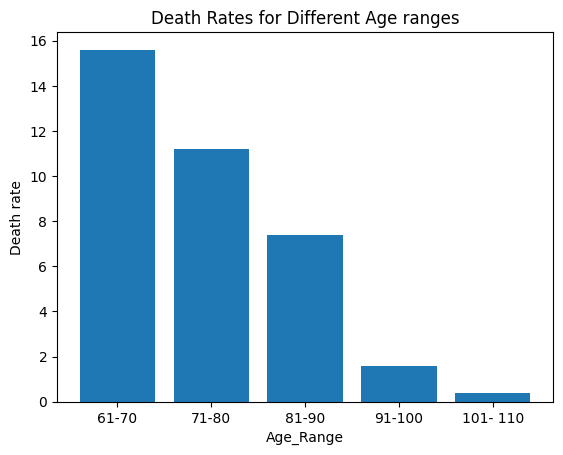

In [239]:
# create a list of death rates
d_rates= [15.6, 11.2, 7.4, 1.6,0.4]

# Create a barplot
plt.bar(["61-70","71-80", "81-90", "91-100", "101- 110"],d_rates)
plt.xlabel("Age_Range")
plt.ylabel("Death rate")
plt.title("Death Rates for Different Age ranges")

# Save plot
plt.savefig("Death_Rates_for_Different_Age_ranges.png")

plt.show()

Population is shrinking

## Population Growth

### Emigrants / Emigration rate
- We shall use female and male divorce of the population to calculate the emigration rate. They are likely to have left town over the course of the year

In [240]:
# Emigrants
female_divorcees = len(census10_df[(census10_df["Marital_Status"] == "Divorced") & \
                     (census10_df["Gender"] == "Female")])
print (female_divorcees)
                     
male_divorcees = len(census10_df[(census10_df["Marital_Status"] == "Divorced") & \
                     (census10_df["Gender"] == "Male")])
print (male_divorcees) 

# Emigration rate
emigration_rate = (female_divorcees - male_divorcees)/len(census10_df) * 1000
print('The emigration rate is:',emigration_rate)

452
285
The emigration rate is: 21.120526116099658


### Immigrants / Immigration rate
- We shall use visitors and lodgers as we can assume they moved into the imaginary town over the course of the year

In [241]:
# Immigrants
visitors = census10_df[(census10_df['Relationship_to_Head_of_House'] == 'Visitor')]
print (len(visitors))

lodgers = census10_df[(census10_df['Relationship_to_Head_of_House'] == 'Lodger')]
print (len(lodgers))

# Immigration rate
immigration_rate =  (len(visitors) + len(lodgers))/len(census10_df) * 1000
print('The immigration rate is:',immigration_rate)

31
353
The immigration rate is: 48.56456304540281


In [242]:
### Population growth to tell if it is shrinking or not


In [243]:
population_growth = ((birth_rate + immigration_rate) - (death_rate + emigration_rate))
print('Population growth is:',population_growth)

Population growth is: 13.552927785506512


Population is growing by 14.55 per 1000

In [244]:
# Assuming census data is stored in a DataFrame called census10_df
streets = census10_df['Street'].unique().tolist() # Get a list of unique street names
num_streets = len(streets) # Count the number of streets

# Calculate the mode (i.e. most frequent) number of bedrooms in a house on each street
mode_list = []
for s in streets:
    temp_df = census10_df[census10_df['Street'] == s]
    mode_house = temp_df['House_Number'].mode()[0] # Get the mode house number
    mode_list.append(len(temp_df[temp_df['House_Number'] == mode_house]))

# Calculate the number of unique house numbers on each street
num_houses_list = [len(census10_df[census10_df['Street'] == streets[x]]['House_Number'].unique()) for x in range(num_streets)]

# Repeat the street name for each house on that street
street_rep = [streets[i] for i in range(num_streets) for j in range(num_houses_list[i])]

# Get a list of unique house numbers across all streets
house_num = [census10_df[census10_df['Street'] == s]['House_Number'].unique().tolist() for s in streets]
dist_house_num = [x for sublist in house_num for x in sublist]

# Repeat the mode number of bedrooms for each house on the street
mode = [mode_list[i] for i in range(num_streets) for j in range(num_houses_list[i])]

# Calculate the occupancy (i.e. number of residents) for each house on the street
occupancy = [len(census10_df[(census10_df['Street'] == street_rep[i]) & (census10_df['House_Number'] == dist_house_num[i])]) for i in range(len(street_rep))]

# Create a new DataFrame with street name, house number, mode, occupancy, and difference between mode and occupancy
housing_demand = pd.DataFrame({'Street': street_rep, 'House_Number': dist_house_num, 'Mode': mode,'Occupancy': occupancy})
housing_demand['Difference'] = housing_demand['Mode'] - housing_demand['Occupancy']

# Print the housing demand DataFrame
housing_demand


,Street,House_Number,Mode,Occupancy,Difference
0,Upland Creek,1,6,2,4
1,Upland Creek,2,6,3,3
2,Upland Creek,3,6,3,3
3,Upland Creek,4,6,1,5
4,Upland Creek,5,6,6,0
...,...,...,...,...,...
2691,Harris Commune,1,13,13,0
2692,Marsh Haven,1,6,6,0
2693,Anderson Castle,1,4,4,0
2694,Harper Fort,1,3,3,0


Based on the information provided, it is challenging to determine the suitable housing density, whether low or high, for the government to construct. This is because the occupancy levels and differences vary significantly across streets and even between different house numbers on the same street.

For instance, Upland Creek has a relatively low occupancy rate and a significant difference between the mode and occupancy, indicating that low-density housing might be appropriate for this area. However, Davis Hollow has a similar mode but a higher occupancy rate and a smaller difference, implying that high-density housing might be more appropriate.

Similarly, Brighton Neck has a higher occupancy rate but a smaller difference, suggesting that high-density housing may be appropriate, while Honeysuckle Avenue has a mix of both high and low occupancy rates and differences, making it difficult to provide a definite recommendation.

In conclusion, the government's decision on whether to build low or high-density housing should factor in various elements, including population density, housing demand, infrastructure, and community needs, among others.

In [245]:
housing_demand['Occupancy'].describe()

count    2696.000000
mean        2.932864
std         1.921159
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: Occupancy, dtype: float64

In [246]:
#import sweetviz as sv

In [247]:
# rep = sv.analyze(census10_df)
# rep.show_html()

### Recommendation

- Some will argue for an emergency medical building but I will recommend the government should invest in old age care services due to the ageing population instead of an emergency medical building.  

- Given the number or percentage of various commuters, including PhD students, university students, visitors, lodgers, married people, and professionals living and working outside the imaginary town, as identified in the Census 10 Data, it may not make sense to build a train station to serve these commuters regardless of how strategically the train station could be located between the two large cities as the number of commuters is relatively small. It could be a project suitable for the future when the town tends to grow.

- However, building a university with hostel facilities in the imaginary town could be a viable option, as it could potentially attract more students to the town and boost the local economy. and the Census Data shows a good number of the population are students who will move into university stream in the near future.

- Additionally, the report suggests that there is no immediate need for building a religious building, and recommends constructing high- or low-density housing based on the occupancy rate and demographics of the area or streets on which the unoccupied plot will be on. The recommendations are backed by data visualization and analysis


referencing